# **Overview**
 Para resolver esse desafio técnico, irei utilizar o framework **CRISP-DM** para garantir que a análise seja estruturada, repetível e orientada a resultados. Seguindo os passos:

1. Definir o problema de negócio.

2. Coletar os dados e obter uma visão geral deles.

3. Dividir os dados em conjuntos de treino e teste.

4. Explorar os dados (análise exploratória de dados).

5. Engenharia de features, limpeza e pré-processamento dos dados.

6. Treinamento de modelos, comparação, seleção de features e ajuste de hiperparâmetros.

7. Teste e avaliação do modelo final de produção.

8. Concluir e interpretar os resultados do modelo.

9. Deploy do modelo.

## **1. Problema de Negócio**

Uma empresa de telecomunicações está enfrentando problemas de: Churn elevado (indicando perda significativa de clientes e impacto direto na receita) e NPS abaixo do esperado (refletindo baixa satisfação e lealdade dos clientes).

O principal produto da empresa possui alto custo de instalação (setup), o que torna cada perda de cliente **especialmente onerosa**.
Diante disso, buscou-se uma estratégia robusta, orientada por dados e centrada na experiência do cliente, com foco em **retenção** e **fidelização**.

Retenção de clientes: é a capacidade de uma empresa manter clientes existentes por mais tempo, evitando que eles deixem a marca ou serviço.

Foco: Reduzir o churn, ou seja, a taxa de cancelamento ou perda de clientes.


Fidelização de clientes: é o processo de criar um vínculo emocional ou de confiança com o cliente, fazendo com que ele escolha sempre a sua marca, mesmo que existam opções concorrentes.

Foco: Transformar clientes em promotores da marca e aumentar o valor do ciclo de vida do cliente.

### **Importar Bibliotecas**

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Split the data.
from sklearn.model_selection import train_test_split

# Utils
import sys
sys.path.append('../src')
from utils import *

# Debugging.
# from src.exception import CustomException # Removed the problematic import
import sys

# Warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', module='matplotlib')

# Formatação de Números Decimais
pd.options.display.float_format = '{:.2f}'.format

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33', '#8ecae6', '#ffb703']
palette_Churn = color_palette[0:2]
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2),
 (0.5568627450980392, 0.792156862745098, 0.9019607843137255),
 (1.0, 0.7176470588235294, 0.011764705882352941)]

## **2. Entendendo os dados**



df_nps

In [2]:
df_nps = pd.read_csv('../data/01_raw/customer_nps.csv')
display(df_nps.head())

print("\n" + "="*50)
df_nps.info()

print("\n" + "="*50)
print(f'The dataset has {df_nps.shape[0]} rows and {df_nps.shape[1]} columns.')

,cpf,NPS
0,10433218100,9
1,96001338914,9
2,8386379499,9
3,2654235114,8
4,16155940789,9



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cpf     7234 non-null   int64
 1   NPS     7234 non-null   int64
dtypes: int64(2)
memory usage: 113.2 KB

The dataset has 7234 rows and 2 columns.


df_original

In [3]:
df_original = pd.read_csv('../data/01_raw/customer_original.csv')
display(df_original.head())

print("\n" + "="*50)
df_original.info()

print("\n" + "="*50)
print(f'The dataset has {df_original.shape[0]} rows and {df_original.shape[1]} columns.')

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,104.332.181-00
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,960.013.389-14
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,083.863.794-99
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,026.542.351-14
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,161.559.407-89



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7234 non-null   int64  
 1   PhoneService      7234 non-null   object 
 2   MultipleLines     7234 non-null   object 
 3   InternetService   7234 non-null   object 
 4   OnlineSecurity    7234 non-null   object 
 5   OnlineBackup      7234 non-null   object 
 6   DeviceProtection  7234 non-null   object 
 7   TechSupport       7234 non-null   object 
 8   StreamingTV       7234 non-null   object 
 9   StreamingMovies   7234 non-null   object 
 10  Contract          7234 non-null   object 
 11  PaperlessBilling  7234 non-null   object 
 12  PaymentMethod     7234 non-null   object 
 13  MonthlyCharges    7234 non-null   float64
 14  TotalCharges      7234 non-null   float64
 15  Churn             7234 non-null   object 
 16  cpf               7234 non-null   object 

df_social

In [4]:
df_social = pd.read_csv('../data/01_raw/customer_social.csv')
display(df_social.head())

print("\n" + "="*50)
df_social.info()

print("\n" + "="*50)
print(f'The dataset has {df_social.shape[0]} rows and {df_social.shape[1]} columns.')

,cpf,gender,SeniorCitizen,Partner,Dependents
0,10433218100,Female,0,Yes,Yes
1,96001338914,Female,0,No,No
2,8386379499,Female,0,Yes,No
3,2654235114,Female,0,No,No
4,16155940789,Male,0,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cpf            7234 non-null   int64 
 1   gender         7234 non-null   object
 2   SeniorCitizen  7234 non-null   int64 
 3   Partner        7234 non-null   object
 4   Dependents     7234 non-null   object
dtypes: int64(2), object(3)
memory usage: 282.7+ KB

The dataset has 7234 rows and 5 columns.


In [5]:
#Checking for duplicate values for the join key 'cpf'

print(f"Number of duplicate CPFs in df_nps: {df_nps.duplicated(subset=['cpf']).sum()}")
print(f"Number of duplicate CPFs in df_original: {df_original.duplicated(subset=['cpf']).sum()}")
print(f"Number of duplicate CPFs in df_social: {df_social.duplicated(subset=['cpf']).sum()}")

Number of duplicate CPFs in df_nps: 169
Number of duplicate CPFs in df_original: 169
Number of duplicate CPFs in df_social: 169


**Conclusões:**

Foi identificado o mesmo número de registros (7.234 registros) nos datasets originais, com a presença de 169 duplicatas. Assumindo que o df_original representa um cadastro único de clientes, essas duplicatas foram classificadas como ruído, resultando em uma base final de 7.065 registros únicos para a análise.

A análise revelou a ausência de valores nulos (NaN) em todos os datasets. Essa condição simplifica a fase de pré-processamento, pois não exige a aplicação de técnicas de imputação de dados.

Inconsistência na Chave de Junção (cpf):

O principal impedimento para a integração dos dados foi a divergência de tipo na chave cpf. A coluna se apresentava como object no df_original e int64 nos demais, além da presença de símbolos. Além disso foi percebido que df_original contém símbolos, df_nps e df_social contém registros sem o primeiro zero. Essas inconsistências impossibilitam a operação de merge e exigem tratamento.

Datasets:

* df_original: Contém features de atendimento, contrato e faturamento do cliente, incluindo a variável alvo Churn.

* df_nps: Mapeia cada cliente (cpf) à sua respectiva métrica de Net Promoter Score (NPS).

* df_social: Agrega os atributos demográficos do cliente, como gênero, senioridade, parceiro e dependentes.

Para contextualizar a análise, o primeiro passo foi a criação de um dicionário de dados. Como este não foi fornecido, a construção iniciou-se pela inferência lógica dos nomes das colunas e pela análise de seus valores únicos.

Esse processo inicial permitiu identificar que o schema do dataset é diretamente compatível com o conhecido benchmark do setor, o 'Telco Customer Churn' (disponível em: https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113). Essa referência, aliada à validação contínua pelos valores de cada coluna, forneceu uma base confiável para definir cada feature e guiar as etapas seguintes da análise.

### **Data dictionary**


**cpf:** Número de identificação do cliente (pode ser útil para unir com outros dataframes).

**NPS:** Net Promoter Score, uma métrica que indica a satisfação e lealdade do cliente. Valores mais altos geralmente indicam maior satisfação.

**tenure:** Tempo que o cliente permaneceu com a empresa (em meses).

**PhoneService:** Indica se o cliente tem serviço telefônico (Yes/No).

**MultipleLines:** Indica se o cliente tem múltiplas linhas telefônicas (Yes/No/No phone service).

**InternetService:** Tipo de serviço de internet do cliente (DSL/Fiber optic/No).

**OnlineSecurity:** Indica se o cliente tem serviço de segurança online (Yes/No/No internet service).

**OnlineBackup:** Indica se o cliente tem serviço de backup online (Yes/No/No internet service).

**DeviceProtection:** Indica se o cliente tem proteção de dispositivo (Yes/No/No internet service).

**TechSupport:** Indica se o cliente tem suporte técnico (Yes/No/No internet service).

**StreamingTV:** Indica se o cliente tem serviço de streaming de TV (Yes/No/No internet service).

**StreamingMovies:** Indica se o cliente tem serviço de streaming de filmes (Yes/No/No internet service).

**Contract:** Tipo de contrato do cliente (Month-to-month/One year/Two year).

**PaperlessBilling:** Indica se o cliente tem faturamento sem papel (Yes/No).

**PaymentMethod:** Método de pagamento do cliente.

**MonthlyCharges:** Valor cobrado do cliente mensalmente.

**TotalCharges:** Valor total cobrado do cliente.

**Churn:** Indica se o cliente cancelou o serviço (Yes/No).

**gender:** Gênero do cliente (Female/Male).

**SeniorCitizen:** Indica se o cliente é um cidadão sênior (0/1).

**Partner:** Indica se o cliente tem um parceiro (Yes/No).

**Dependents:** Indica se o cliente tem dependentes (Yes/No).

 **Unificando os dataframes**

 Eliminando Duplicatas, símbolos e unindo os DataFrames pela chave 'cpf'

In [6]:
# Remove duplicate rows from all dataframes e cria cópias independentes
df_original = df_original.drop_duplicates(subset=['cpf']).copy()
df_nps = df_nps.drop_duplicates(subset=['cpf']).copy()
df_social = df_social.drop_duplicates(subset=['cpf']).copy()

# Limpa e converte para df_original
df_original['cpf'] = df_original['cpf'].astype(str).str.replace('[^0-9]', '', regex=True)
df_original['cpf'] = df_original['cpf'].astype('int64')

# Limpa e converte para df_nps
df_nps['cpf'] = df_nps['cpf'].astype(str).str.replace('[^0-9]', '', regex=True)
df_nps['cpf'] = df_nps['cpf'].astype('int64')

# Limpa e converte para df_social
df_social['cpf'] = df_social['cpf'].astype(str).str.replace('[^0-9]', '', regex=True)
df_social['cpf'] = df_social['cpf'].astype('int64')

In [7]:
df_merged = df_original.merge(df_nps, on='cpf', how='left')
df_merged = df_merged.merge(df_social, on='cpf', how='left')

print("Merged DataFrame Info:")
df_merged.info()

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7065 non-null   int64  
 1   PhoneService      7065 non-null   object 
 2   MultipleLines     7065 non-null   object 
 3   InternetService   7065 non-null   object 
 4   OnlineSecurity    7065 non-null   object 
 5   OnlineBackup      7065 non-null   object 
 6   DeviceProtection  7065 non-null   object 
 7   TechSupport       7065 non-null   object 
 8   StreamingTV       7065 non-null   object 
 9   StreamingMovies   7065 non-null   object 
 10  Contract          7065 non-null   object 
 11  PaperlessBilling  7065 non-null   object 
 12  PaymentMethod     7065 non-null   object 
 13  MonthlyCharges    7065 non-null   float64
 14  TotalCharges      7065 non-null   float64
 15  Churn             7065 non-null   object 
 16  cpf               7

In [8]:
#Looking at dataset general information.
df_merged.duplicated().sum()

0

In [9]:
df_merged.isna().sum()

tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
cpf                 0
NPS                 0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

Assim, a base de dados contém 7.065 registros, correspondendo a clientes únicos, sem dados ausentes em nenhuma das 22 features. A tipagem das variáveis está consistente com seus respectivos domínios (numérico, categórico).

In [10]:
# Drop a coluna cpf
df_merged = df_merged.drop('cpf', axis=1)
df_merged.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NPS,gender,SeniorCitizen,Partner,Dependents
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Bank transfer (automatic),118.75,8672.45,No,9,Female,0,Yes,Yes
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Electronic check,118.65,8477.60,No,9,Female,0,No,No
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,No,Mailed check,118.60,7990.05,No,9,Female,0,Yes,No
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Electronic check,118.60,7365.70,No,8,Female,0,No,No
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Bank transfer (automatic),118.35,7804.15,Yes,9,Male,0,No,No


In [11]:
df_merged.to_csv('../data/02_processed/df_merged.csv', index=False)
print("DataFrame df_merged salvo como 'data/02_processed/df_merged.csv'")

DataFrame df_merged salvo como 'data/02_processed/df_merged.csv'


### Direcionamento Estratégico

O desafio apresentado envolve dois indicadores fundamentais para a empresa: Churn e NPS. Ambos impactam a sustentabilidade do negócio, mas de maneiras distintas. Para definir o direcionamento estratégico, foram considerados três critérios principais: impacto para o negócio, viabilidade de atuação e potencial de melhoria.

1. Impacto para o negócio:
O churn elevado gera perdas financeiras imediatas, uma vez que cada cliente perdido representa não apenas a redução da receita recorrente, mas também o desperdício do alto custo de instalação do serviço. Já o NPS reflete a satisfação e a lealdade dos clientes, sendo essencial para a fidelização no longo prazo. No entanto, seu impacto é indireto e de difícil mensuração em curto prazo, além de estar sujeito a interpretações individuais. Dois clientes podem atribuir a mesma nota de forma distinta (por exemplo, uma nota 5 para um pode significar indiferença, enquanto para outro representa forte insatisfação), o que torna o indicador mais subjetivo e menos consistente para guiar ações imediatas.

2. Viabilidade de atuação:
A base de dados disponibilizada contém variáveis fortemente associadas à propensão ao cancelamento, como tenure, Contract, PaymentMethod, PaperlessBilling, MonthlyCharges e TotalCharges. Essas variáveis permitem a construção de modelos preditivos consistentes, com alta capacidade de identificar clientes em risco e apoiar ações de retenção direcionadas. Já no caso do NPS, embora existam variáveis que influenciam a percepção de valor (OnlineSecurity, TechSupport, StreamingTV, entre outras), a relação é menos direta e mais difícil de traduzir em ações preditivas baseadas nos dados disponíveis.

3. Potencial de melhoria:
A redução do churn apresenta alto potencial de melhoria, pois há oportunidades claras de intervenção: campanhas específicas para clientes em contratos mensais, incentivos para clientes recém-adquiridos, ajustes de preços ou benefícios para clientes com altos gastos mensais. Já o NPS, embora fundamental para a fidelização, depende de iniciativas estruturais de médio e longo prazo, como a melhoria na qualidade percebida do serviço e no suporte técnico, que exigem maior investimento e tempo para gerar impacto, além de estar sujeito a variações subjetivas de avaliação por parte dos clientes.

Diante dessa análise, o churn será adotado como indicador central da estratégia, por apresentar maior impacto financeiro imediato, maior viabilidade de atuação com base nos dados disponíveis e alto potencial de melhoria por meio de ações práticas e mensuráveis.

O NPS será acompanhado como indicador complementar, servindo para mapear os fatores de insatisfação e orientar melhorias estruturais que reforcem a fidelização no médio e longo prazo. Dessa forma, a estratégia equilibra ações de curto prazo voltadas à retenção com iniciativas de longo prazo orientadas à experiência do cliente.

## **3. Split dos dados em treino e teste**

Primeiramente, vou dividir os dados em conjuntos de treino e teste.

O conjunto de teste deve ser composto por dados que o modelo nunca viu antes.

Vou realizar a Análise Exploratória de Dados (EDA) focando no conjunto de treino para evitar o vazamento de dados **(data leakage)**, obter uma representação realista e avaliar o modelo corretamente com dados novos e não vistos.

Vou especificar stratify=y para que a função train_test_split garanta que o processo de divisão mantenha o mesmo percentual de cada classe da variável alvo, tanto no conjunto de treino quanto no de teste. Isso é particularmente útil ao lidar com datasets desbalanceados, que é o nosso caso, pois há mais clientes ativos do que clientes que saíram (evadidos).

In [12]:
df_merged.columns

Index(['tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'NPS',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [13]:
X = df_merged.drop(columns=['Churn'])
y = df_merged['Churn'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (5652, 20).
Train target dataset shape: (5652,).
Test predictor dataset shape: (1413, 20).
Test target dataset shape: (1413,).


In [15]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64

Test target proportion: 
Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64


A proporção de classes do target foi preservada

## **4. Análise Exploratória de Dados (EDA)**

Vou explorar o conjunto de treino para entender melhor como as features (variáveis) são distribuídas individualmente, os relacionamentos entre elas, as correlações, tendências e possíveis insights dos dados, especialmente em relação à variável alvo (Churn). Para isso, farei análises univariada, bivariada e multivariada dos dados.

Manterei um conjunto de treino completo (com as variáveis preditoras e a alvo juntas) a fim de usar o parâmetro hue da biblioteca Seaborn para as visualizações.

In [16]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NPS,gender,SeniorCitizen,Partner,Dependents,Churn
2188,68,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Credit card (automatic),85.00,5607.75,10,Female,0,Yes,Yes,No
1561,38,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,...,No,Bank transfer (automatic),91.70,3479.05,7,Male,0,Yes,No,No
6097,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,...,No,Mailed check,20.40,42.90,8,Male,0,No,Yes,No
2915,9,Yes,No,Fiber optic,No,No,No,No,Yes,No,...,Yes,Bank transfer (automatic),77.65,714.15,3,Female,0,No,No,Yes
3386,62,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,...,Yes,Credit card (automatic),72.00,4284.20,10,Female,0,Yes,No,No


Vou criar listas separadas para as features categóricas, numéricas e para a variável alvo, a fim de analisar os dados separadamente.

In [17]:
numerical_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

categorical_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

target = 'Churn'

print(f'\nNumerical features: {len(numerical_features)}: ')
print(numerical_features)
print(f'\nCategorical features {len(categorical_features)} ')
print(categorical_features)
print(f'\nTarget: {target}.')


Numerical features: 3: 
['tenure', 'MonthlyCharges', 'TotalCharges']

Categorical features 16 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Target: Churn.


Vou analisar os valores únicos das features categóricas. O número de categorias únicas é um fator importante na escolha de uma técnica de encoding para elas.

In [18]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {df_train[feature].nunique()} unique values. They are: ')
    print(df_train[feature].value_counts(normalize=True))
    print()

gender
----------------------------------------
There are 2 unique values. They are: 
gender
Male     0.51
Female   0.49
Name: proportion, dtype: float64

SeniorCitizen
----------------------------------------
There are 2 unique values. They are: 
SeniorCitizen
0   0.84
1   0.16
Name: proportion, dtype: float64

Partner
----------------------------------------
There are 2 unique values. They are: 
Partner
No    0.52
Yes   0.48
Name: proportion, dtype: float64

Dependents
----------------------------------------
There are 2 unique values. They are: 
Dependents
No    0.71
Yes   0.29
Name: proportion, dtype: float64

PhoneService
----------------------------------------
There are 2 unique values. They are: 
PhoneService
Yes   0.90
No    0.10
Name: proportion, dtype: float64

MultipleLines
----------------------------------------
There are 3 unique values. They are: 
MultipleLines
No                 0.48
Yes                0.42
No phone service   0.10
Name: proportion, dtype: float64

Inte

* A variável Contract aprentou ordem natural entre as categorias (Month-to-month < One year < Two year). Por isso, será aplicado Ordinal Encoding com o mapeamento: {"Month-to-month": 0, "One year": 1, "Two year": 2} na etapa de Pré-Processamento.

* As demais variáveis categóricas não apresentaram hierarquia, por isso serão tratadas com One-Hot Encoding para evitar a criação de relações artificiais entre categorias nominais.


### **Análise Univariada**
Farei a análise univariada a seguir para entender quais são os valores típicos de cada feature para os clientes da empresa.

### **Target**

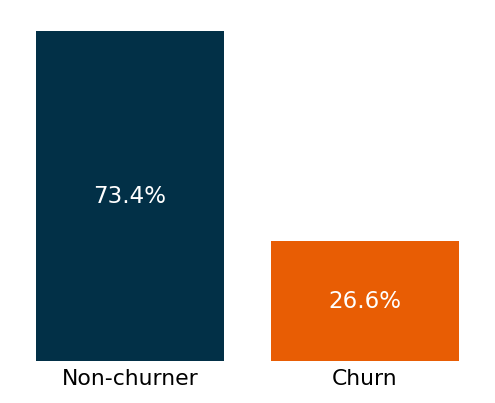

In [19]:
order = ['No', 'Yes']
counts = df_train['Churn'].value_counts().loc[order]

palette = ['#023047', '#e85d04']
labels_map = ['Non-churner', 'Churn']
fig, ax = plt.subplots(figsize=(4, 3))

bars = ax.bar(counts.index, counts.values, color=palette)

total = len(df_train)
bar_labels = [f'{(h / total) * 100:.1f}%' for h in counts.values]
ax.bar_label(bars, labels=bar_labels, color='white', fontsize=11, label_type='center')

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks(ticks=range(len(order)), labels=labels_map, fontsize=10.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.get_yaxis().set_visible(False)
ax.grid(False)

plt.show()

A variável alvo está desbalanceada. 26,6% dos clientes são churners (ou seja, cancelaram o serviço). Portanto, adotarei algumas estratégias para lidar com essa questão. São elas:

Validação cruzada estratificada (Stratified hold-out e k-fold), a fim de manter a proporção do alvo nos conjuntos de teste e validação, inclusive durante o ajuste de hiperparâmetros.

Definir pesos de classe (class weights) diferentes para as instâncias das classes majoritária e minoritária. A ideia é atribuir pesos maiores à classe minoritária, de modo que o modelo seja mais penalizado ao classificar erroneamente um cliente que cancelou. Esses pesos são configurados através de um hiperparâmetro específico do modelo.

Analisar o trade-off entre precisão e recall, se necessário. O objetivo principal aqui é prever as probabilidades de churn, e não uma classificação binária. Isso permitirá que a empresa de telecomunicações tome decisões mais bem informadas. Em vez de simplesmente avaliar se um cliente vai cancelar ou não, ela poderá verificar qual a probabilidade de ele abandonar o serviço.

### **Distribuição de Features Numéricas**
Vou analisar a distribuição das features numéricas a seguir para determinar se existem distribuições assimétricas e quais são os valores mais comuns para os atributos numéricos dos clientes da empresa de telecomunicações.

In [20]:
def plot_histogram_outliers(variable):
  """
  Gera um histograma com linha de densidade (KDE) e um boxplot
  para visualizar a distribuição e os outliers de uma variável.

  Args:
      variable (str): O nome da coluna (variável) a ser plotada.
  """
  fig, axes = plt.subplots(1, 2, figsize=(17, 2))

  # Gera o histograma com a linha de densidade (KDE)
  sns.histplot(x=variable, data=df_train, ax=axes[0], kde=True)

  # Gera o boxplot
  sns.boxplot(x=variable, data=df_train, ax=axes[1])

  plt.show()

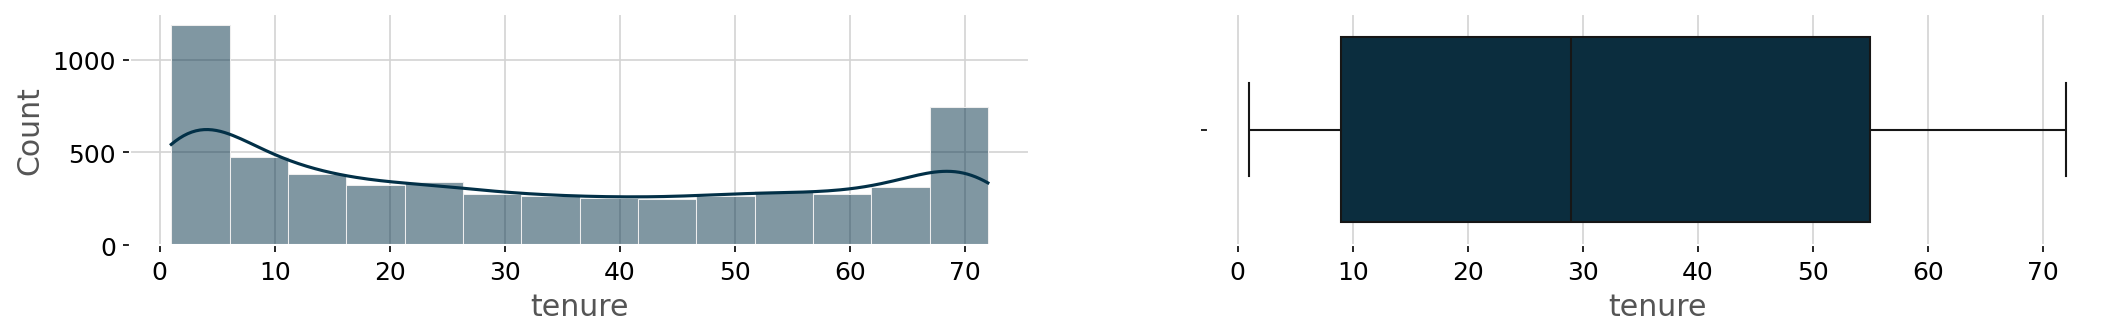

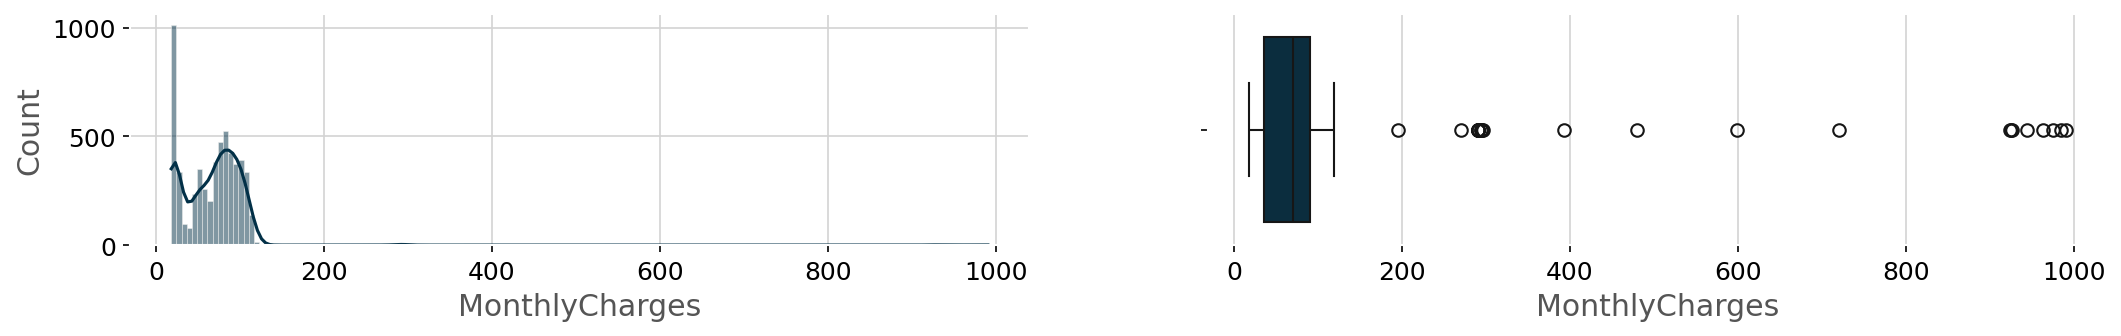

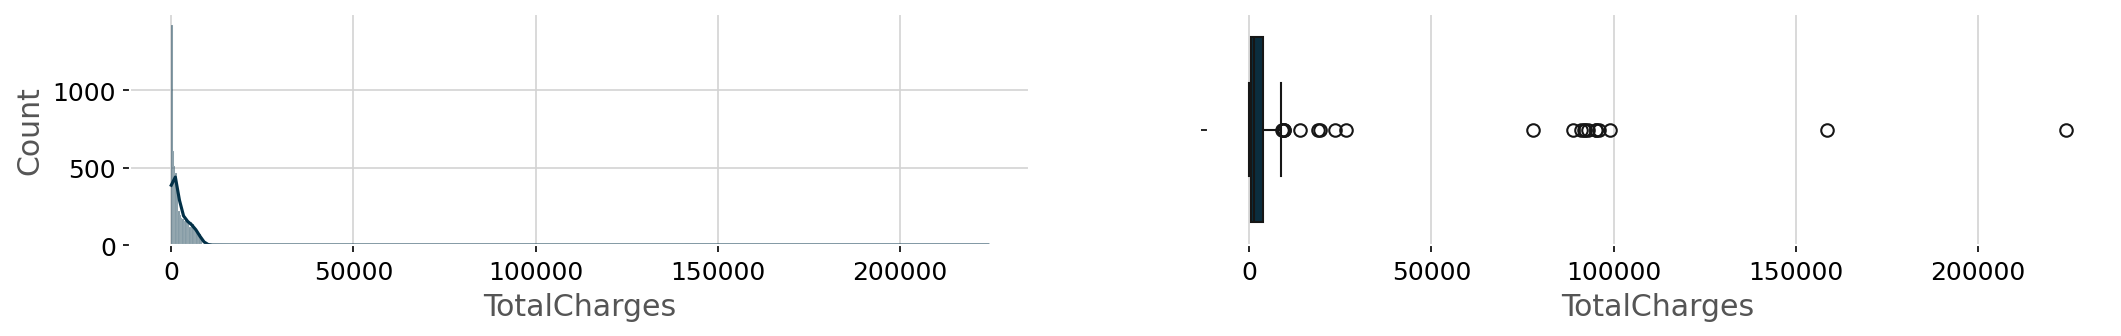

In [21]:
for features in numerical_features:
  plot_histogram_outliers(features)

INSIGHTS:
* A distribuição do tempo de contrato (tenure) indica dois grupos em destaque: clientes recentes e de longa data. Isso pode sugerir que a empresa tem uma alta taxa de cancelamento (churn) nos estágios iniciais, mas aqueles que superam essa fase tendem a permanecer.
* A cobrança mensal (MonthlyCharges) apresentou um distribuição com dois picos de arrecadação. Essa divisão pode representar dois segmentos de clientes distintos: um que consome um serviço de entrada (talvez apenas telefonia) e outro que adquire pacotes mais completos (internet, streaming, etc.).
* As cobranças totais (TotalCharges) são fortemente assimétricas à direita. Isso significa que a grande maioria dos clientes acumulou um valor baixo de cobranças totais, o que é consistente com a grande quantidade de novos clientes vista no gráfico de tenure. A receita total da empresa parece ser impulsionada por uma minoria de clientes de longo prazo, que formam a "cauda longa" da distribuição e representam os valores mais altos.

### **Outliers**

Agora, avaliarei os outliers são dados ruidosos ou podem ser informativos na análise.

In [ ]:
# Serach for outliers
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df_train, features=numerical_features)

INFO:utils:Existem 45 outliers no dataset.
INFO:utils:Número (percentual) de outliers por feature:
INFO:utils:tenure: 0 (0.0%)
INFO:utils:MonthlyCharges: 24 (0.42%)
INFO:utils:TotalCharges: 21 (0.37%)


In [ ]:
# Calculating the expected total charges
df_train["Expected_Total"] = df_train["tenure"] * df_train["MonthlyCharges"]

# Define tolerance of 20%
tolerance = 0.2
df_train["Within_Tolerance"] = (
    (df_train["TotalCharges"] >= (1 - tolerance) * df_train["Expected_Total"]) &
    (df_train["TotalCharges"] <= (1 + tolerance) * df_train["Expected_Total"])
)

# Mark values 20x above expected
df_train["Above_100x"] = df_train["TotalCharges"] >= 20 * df_train["Expected_Total"]

# Count of records
total = len(df_train)
count_within_tolerance = df_train["Within_Tolerance"].sum()
count_above_20x = df_train["Above_100x"].sum()

# Percentages
perc_within_tolerance = (count_within_tolerance / total) * 100
perc_above_20x = (count_above_20x / total) * 100

# Final output
print(f"1. Dentro de 20% do esperado: {count_within_tolerance} registros ({perc_within_tolerance:.2f}%)")
print(f"2. 20x acima do esperado: {count_above_20x} registros ({perc_above_20x:.4f}%)\n")

# Show lines 20x above expected
if count_above_20x > 0:
    print("Registros com TotalCharges >= 20x Expected_Total:")
    print(df_train[df_train["Above_100x"]][["tenure", "MonthlyCharges", "TotalCharges", "Expected_Total"]].head())
df_train = df_train.drop(columns=["Expected_Total", "Within_Tolerance", "Above_100x"])


1. Dentro de 20% do esperado: 5581 registros (98.74%)
2. 20x acima do esperado: 3 registros (0.0531%)

Registros com TotalCharges >= 20x Expected_Total:
      tenure  MonthlyCharges  TotalCharges  Expected_Total
7035       8          195.65      77778.10         1565.20
7038       9          294.05      88811.65         2646.45
7064       7           20.05      99164.85          140.35


Apesar das proporções de valores discrepantes serem baixas, foi verificada uma inconsistência nas informações entre o valor cobrado esperado de um cliente pelo seu tempo de permanência e valor mensal cobrado, com relação ao valor total cobrado. A análise revelou que em 98.74% o valor total cobrado estava dentro de uma tolerância de 20% do valor mensal cobrado pelo tempo de permanência, enquanto 3 registros estiveram 20 vezes acima do esperado, o que demonstra claramente a existência de dados ruidosos.

 Assim valores fora do intervalo quartil foram considerados ruidosos e serão removidos na etapa de data cleaning.

 **Processando Outliers**

In [24]:
features = ["MonthlyCharges", "TotalCharges"]
outlier_indexes, outlier_counts, total_outliers = check_outliers(X_train, features)

INFO:utils:Existem 45 outliers no dataset.
INFO:utils:Número (percentual) de outliers por feature:
INFO:utils:MonthlyCharges: 24 (0.42%)
INFO:utils:TotalCharges: 21 (0.37%)


In [25]:
all_outlier_indexes = set()
for idx_list in outlier_indexes.values():
    all_outlier_indexes.update(idx_list)

df_clean = df_train.drop(index=all_outlier_indexes)
df_train = df_clean.copy()

print(f"Dataset size: {len(df_train)}")
print(f"Total outliers removed: {len(all_outlier_indexes)}")

Dataset size: 5627
Total outliers removed: 25


### **Distribuição das Features Categóricas**

In [26]:
X_train[categorical_features].describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2868,2926,3985,5108,2714,2511,2812,2479,2477,2776,2237,2227,3134,3344,1899


INSIGHTS:
* 1. A grande maioria dos clientes possui serviço de telefonia. Isso indica que este é um serviço preferencial neste conjunto de dados, e talvez não seja um grande diferenciador para a análise de churn por si só.
* 2. Uma parcela significativa dos clientes não possui dependentes. Este pode ser um fator demográfico importante, sugerindo um perfil de cliente mais individual ou de casais sem filhos, que pode ter comportamentos de consumo e fidelidade diferentes.
* 3. Mais da metade dos clientes optou pela fatura sem papel (Paperless Billing), mostrando uma boa adesão a meios digitais de cobrança.
* 4. As variáveis "gender" e "Partner" são bem equilibradas, com a categoria mais frequente em cada uma representando pouco mais de 50% dos dados, indicando que não há um domínio claro de um perfil sobre o outro

Criei um filtro para analisar o sentimento de NPS como ruim, médio e bom e armazenei essa variável no dataset de treino. Além disso, criei uma nova feature relacionada à quantidade de serviços que o cliente contrata.

In [27]:
def classificar_nps(nota):
    if nota >= 9:
        return 'Promoters'
    elif 7 <= nota <= 8:
        return 'Passives'
    else:
        return 'Detractors'

df_train['Classificacao_NPS'] = df_train['NPS'].apply(classificar_nps)

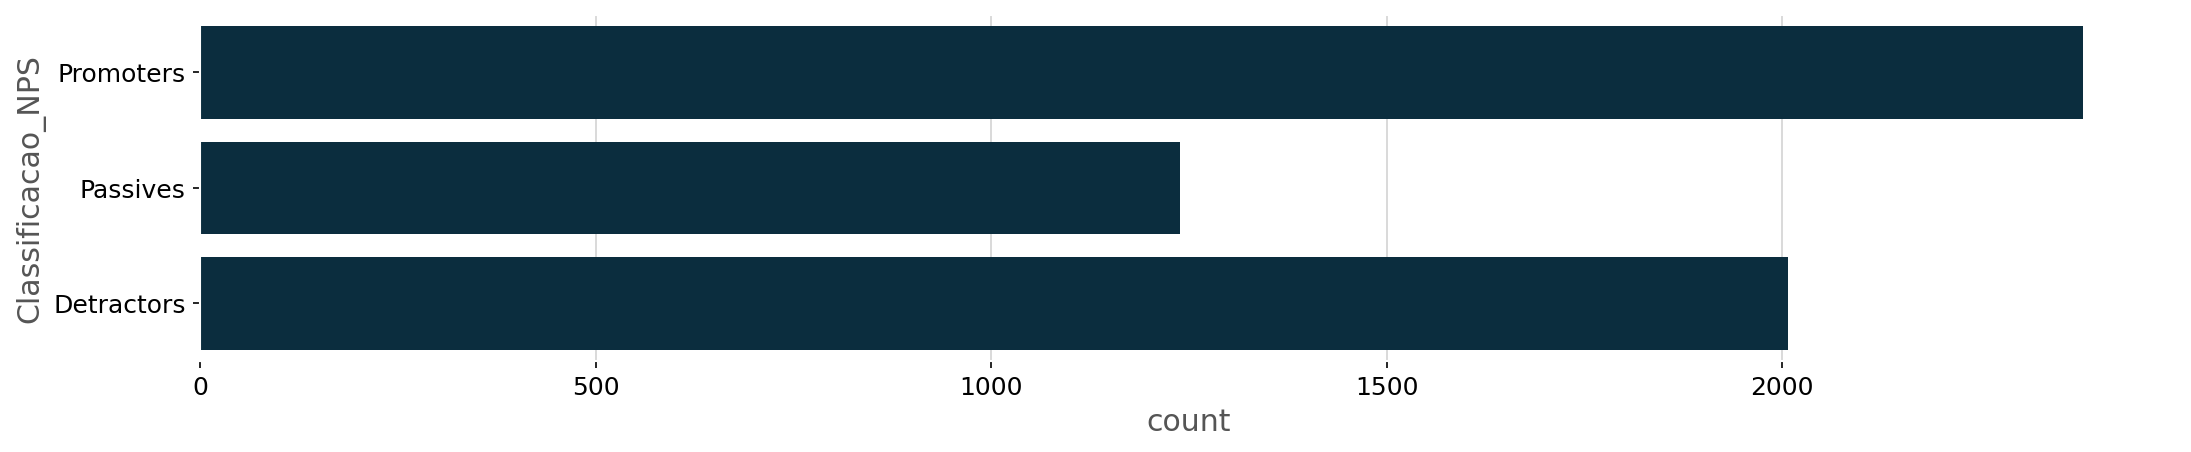

In [28]:
plt.figure(figsize = (17,3))
sns.countplot(data=df_train,y='Classificacao_NPS')
plt.show()

In [29]:
# Creating a dataframe with all 9 possible services
services = df_train[['PhoneService','MultipleLines','InternetService',
               'OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies']]

# Transforming data to show 1 when service is contracted and 0 when it isn't
services['PhoneService'] = services['PhoneService'].map({'Yes':1,'No':0})
for item in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
  services[item] = services[item].map({'Yes':1,'No internet service':0,'No':0})
services['MultipleLines'] = services['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})
services['InternetService'] = services['InternetService'].map({'DSL':1,'Fiber optic':1,'No':0})

# Adding the values from each row to create a new column
services['total_services'] = services.sum(axis=1)

# Transferring the column to the original dataframe
df_train = pd.concat([df_train, services['total_services']], axis=1)
services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_services
2188,1,0,1,1,1,1,1,1,1,8
1561,1,1,1,1,0,0,0,1,0,5
6097,1,0,0,0,0,0,0,0,0,1
2915,1,0,1,0,0,0,0,1,0,3
3386,1,0,1,1,1,1,0,1,0,6


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


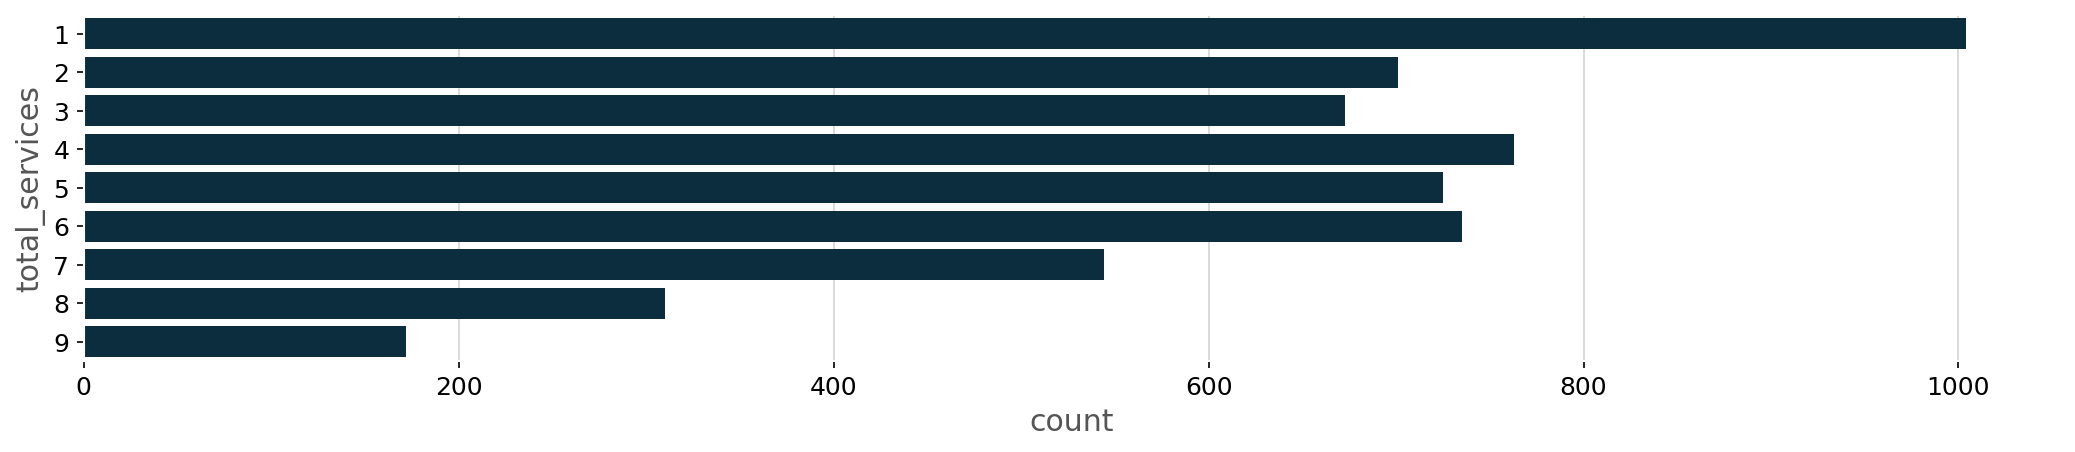

In [30]:
plt.figure(figsize = (17,3))
sns.countplot(data=df_train,y='total_services')
plt.show()

In [31]:
# New features visualization
df_train.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MonthlyCharges,TotalCharges,NPS,gender,SeniorCitizen,Partner,Dependents,Churn,Classificacao_NPS,total_services
2188,68,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,...,85.00,5607.75,10,Female,0,Yes,Yes,No,Promoters,8
1561,38,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,...,91.70,3479.05,7,Male,0,Yes,No,No,Passives,5
6097,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,...,20.40,42.90,8,Male,0,No,Yes,No,Passives,1
2915,9,Yes,No,Fiber optic,No,No,No,No,Yes,No,...,77.65,714.15,3,Female,0,No,No,Yes,Detractors,3
3386,62,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,...,72.00,4284.20,10,Female,0,Yes,No,No,Promoters,6


**INSIGHT:** Podemos observar que o número de categorias em cada variável varia de 2 a 4 e, comumente, essas categorias possuem valores como "Yes" ou "No". Portanto, vamos criar alguns gráficos para análise.

Dividindo as categorias por grupos de análise

In [32]:
palette_group1 = color_palette[2:4]
palette_group2 = color_palette[4:6]
palette_group3 = color_palette[6:8]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


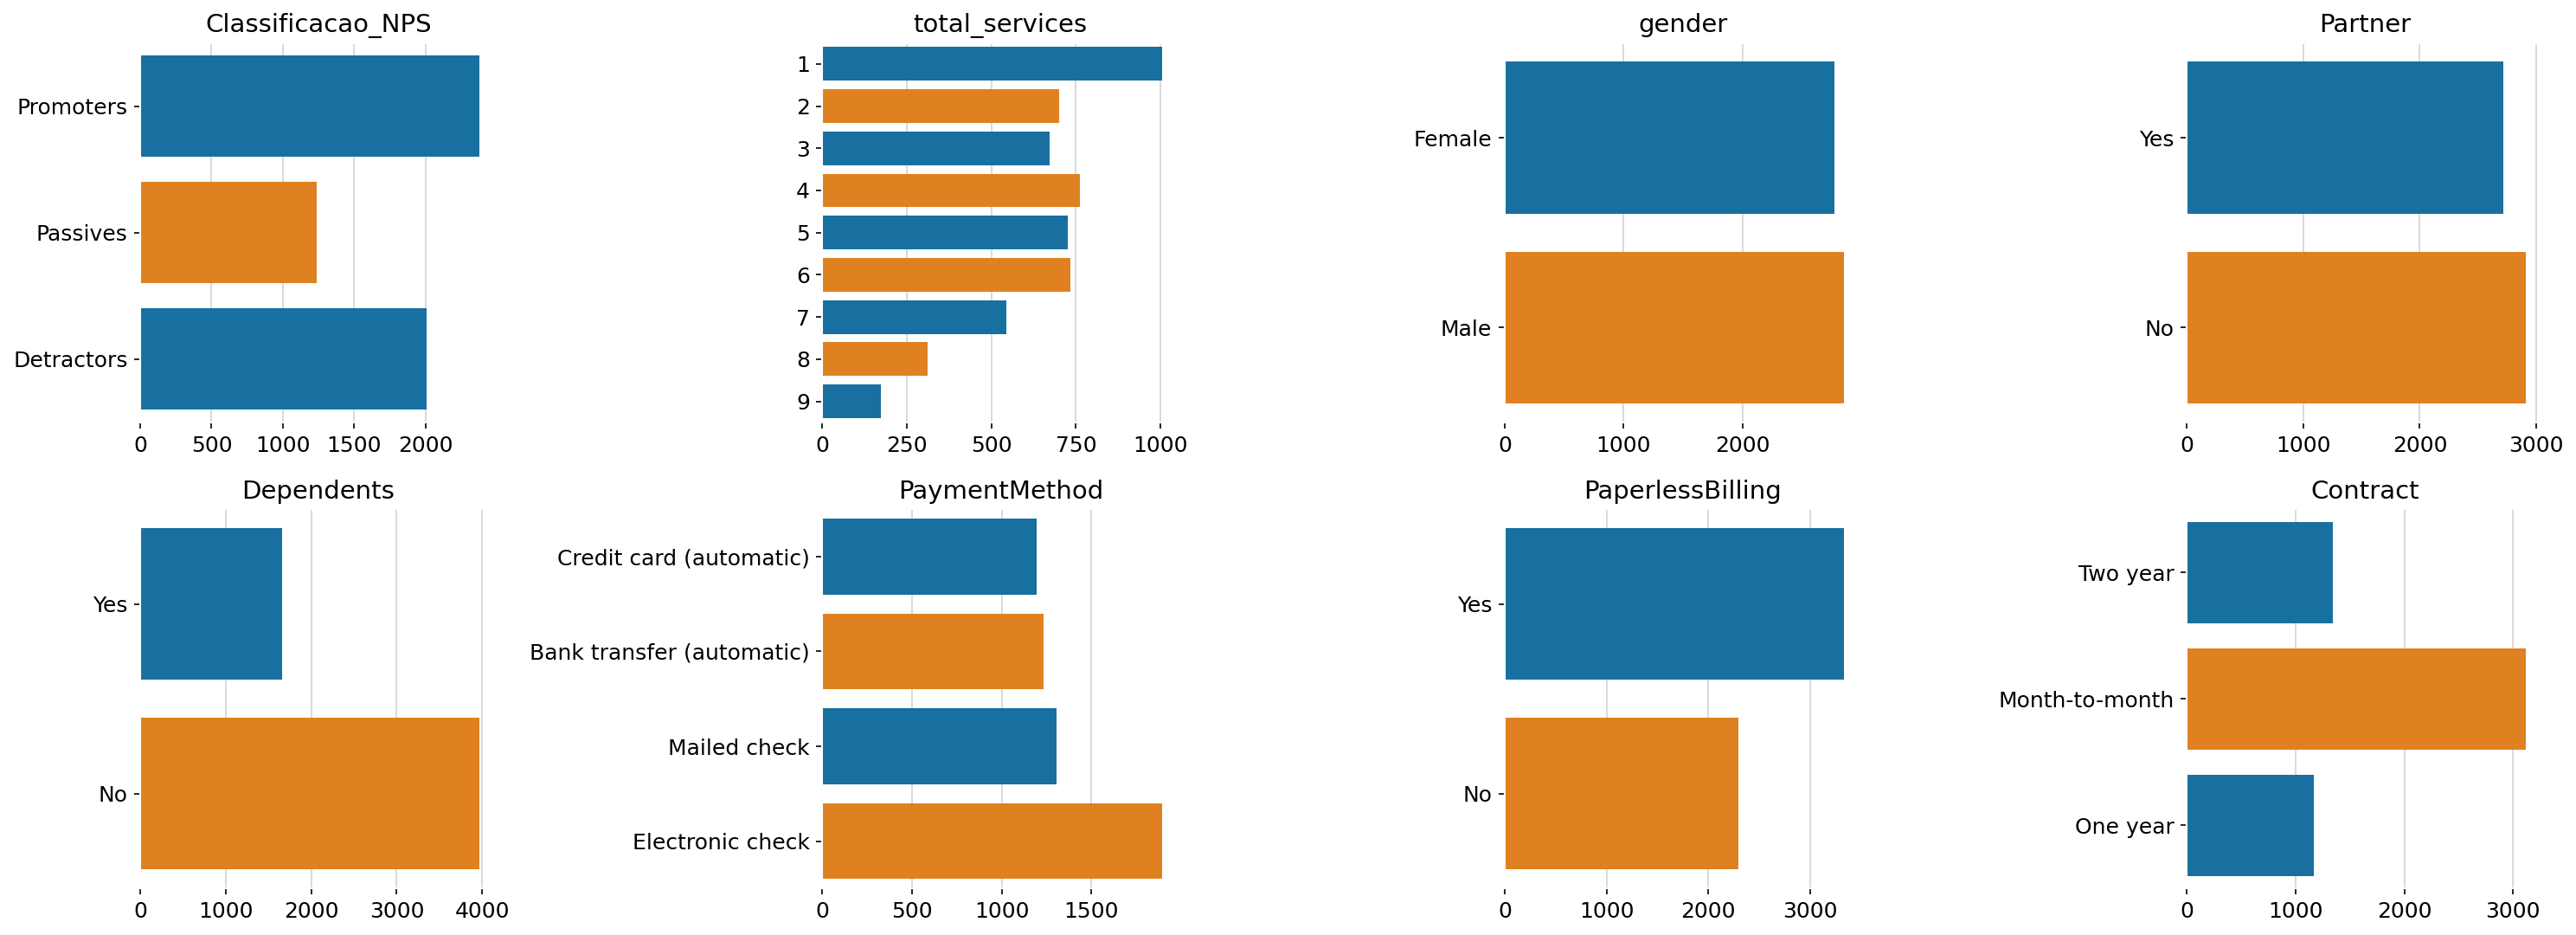

In [33]:
# List of variables for Group 1
group1_vars = ['Classificacao_NPS', 'total_services', 'gender', 'Partner',
               'Dependents', 'PaymentMethod', 'PaperlessBilling', 'Contract']

# Create figure and axes (2 rows, 4 columns)
fig1, axes1 = plt.subplots(2, 4, figsize=(20, 8)) # sharex=True removed as it might not be appropriate for different categorical variables
axes1 = axes1.flatten()

for i, var_name in enumerate(group1_vars): # Change loop to iterate over group1_vars
    # Corrected the extra comma in the sns.countplot call
    sns.countplot(y=var_name, data=df_train, ax=axes1[i], palette=palette_group1)
    axes1[i].set_title(var_name, fontsize=14)
    axes1[i].set_ylabel('')
    axes1[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjusts layout for the supertitle
plt.show()

**INSIGHTS:**

* A distribuição de gênero foi equilibrada.

* A maior parte do clientes não possui parceiro(a) e uma grande parcela não possui dependentes, indicando um perfil de cliente predominantemente individual.

* O contrato "Month-to-month" (mês a mês) foi o mais comum, o que representa um baixo nível de fidelização contratual e um risco maior de cancelamento.

* O método de pagamento mais utilizado foi o "Electronic check". A empresa poderia criar estratégias para incentivar a migração para métodos de pagamento automáticos, que tendem a reter mais os clientes.

* O número de clientes Detratores foi alto, próximo ao de Promotores, que foi levemente superior. Isso sinaliza uma insatisfação o serviço. A menor parcela foi a dos Passives.

* Como esperado, a maior parte da base de clientes possui poucos serviços contratados (entre 1 e 4), o que aponta para uma oportunidade de vender mais produtos para os clientes atuais.

* Mais da metade dos clientes (cerca de 60%) já aderiu à fatura digital (PaperlessBilling), mostrando uma boa aceitação de canais digitais.

Grupo Serviço Telefonia

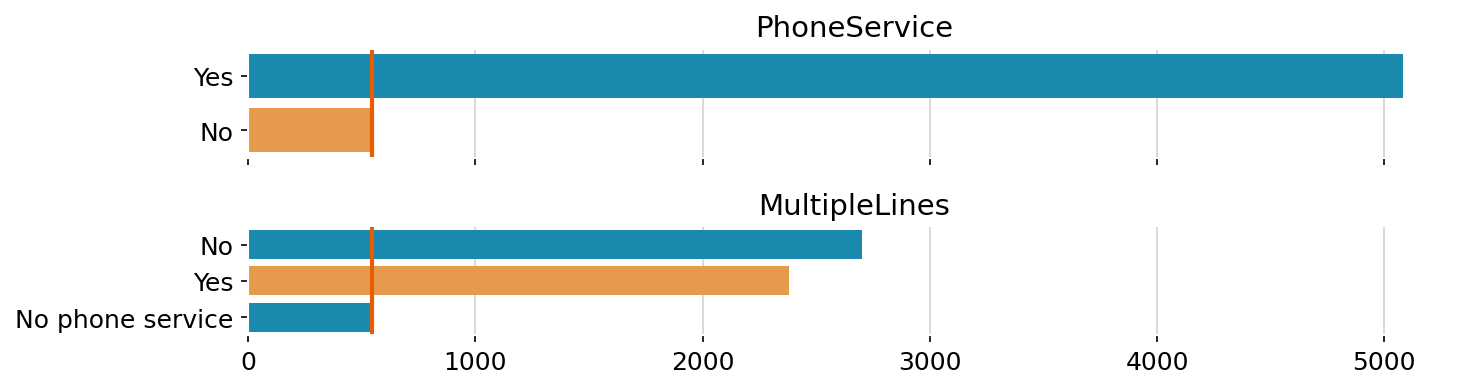

In [34]:
# Reference line
No_Phone_Serv = df_train['PhoneService'].value_counts().loc['No']
group2_vars = ['PhoneService', 'MultipleLines']

fig2, axes2 = plt.subplots(2, 1, figsize=(10, 3), sharex=True)
axes2 = axes2.flatten()

for i, var_name in enumerate(group2_vars):
    sns.countplot(y=var_name, data=df_train, ax=axes2[i], palette=palette_group2)
    axes2[i].axvline(x=No_Phone_Serv, linewidth=2, color=color_palette[1])
    axes2[i].set_title(var_name, fontsize=14)
    axes2[i].set_ylabel('')
    axes2[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**INSIGHTS:**
*  A grande maioria dos clientes possui serviço de telefonia (PhoneService). Isso indica que este é um produto central ou de entrada para a empresa, com alta taxa de adesão.

* Quase metade dos clientes elegíveis compraram o serviço de "múltiplas linhas",portanto foi bem aceito. Além disso, existe um grupo grande e bem definido de clientes para quem a empresa pode tentar vender esse serviço que parece ter alta taxa de adesão também.

* O número de clientes na categoria "No" do gráfico PhoneService é exatamente o mesmo que o número de clientes na categoria "No phone service" do gráfico MultipleLines. Isso implica inferir que os dados são confiáveis e que a categoria "No phone service" não é um dado faltante, mas uma consequência lógica de não ter o serviço principal.



Grupo Serviço de Internet

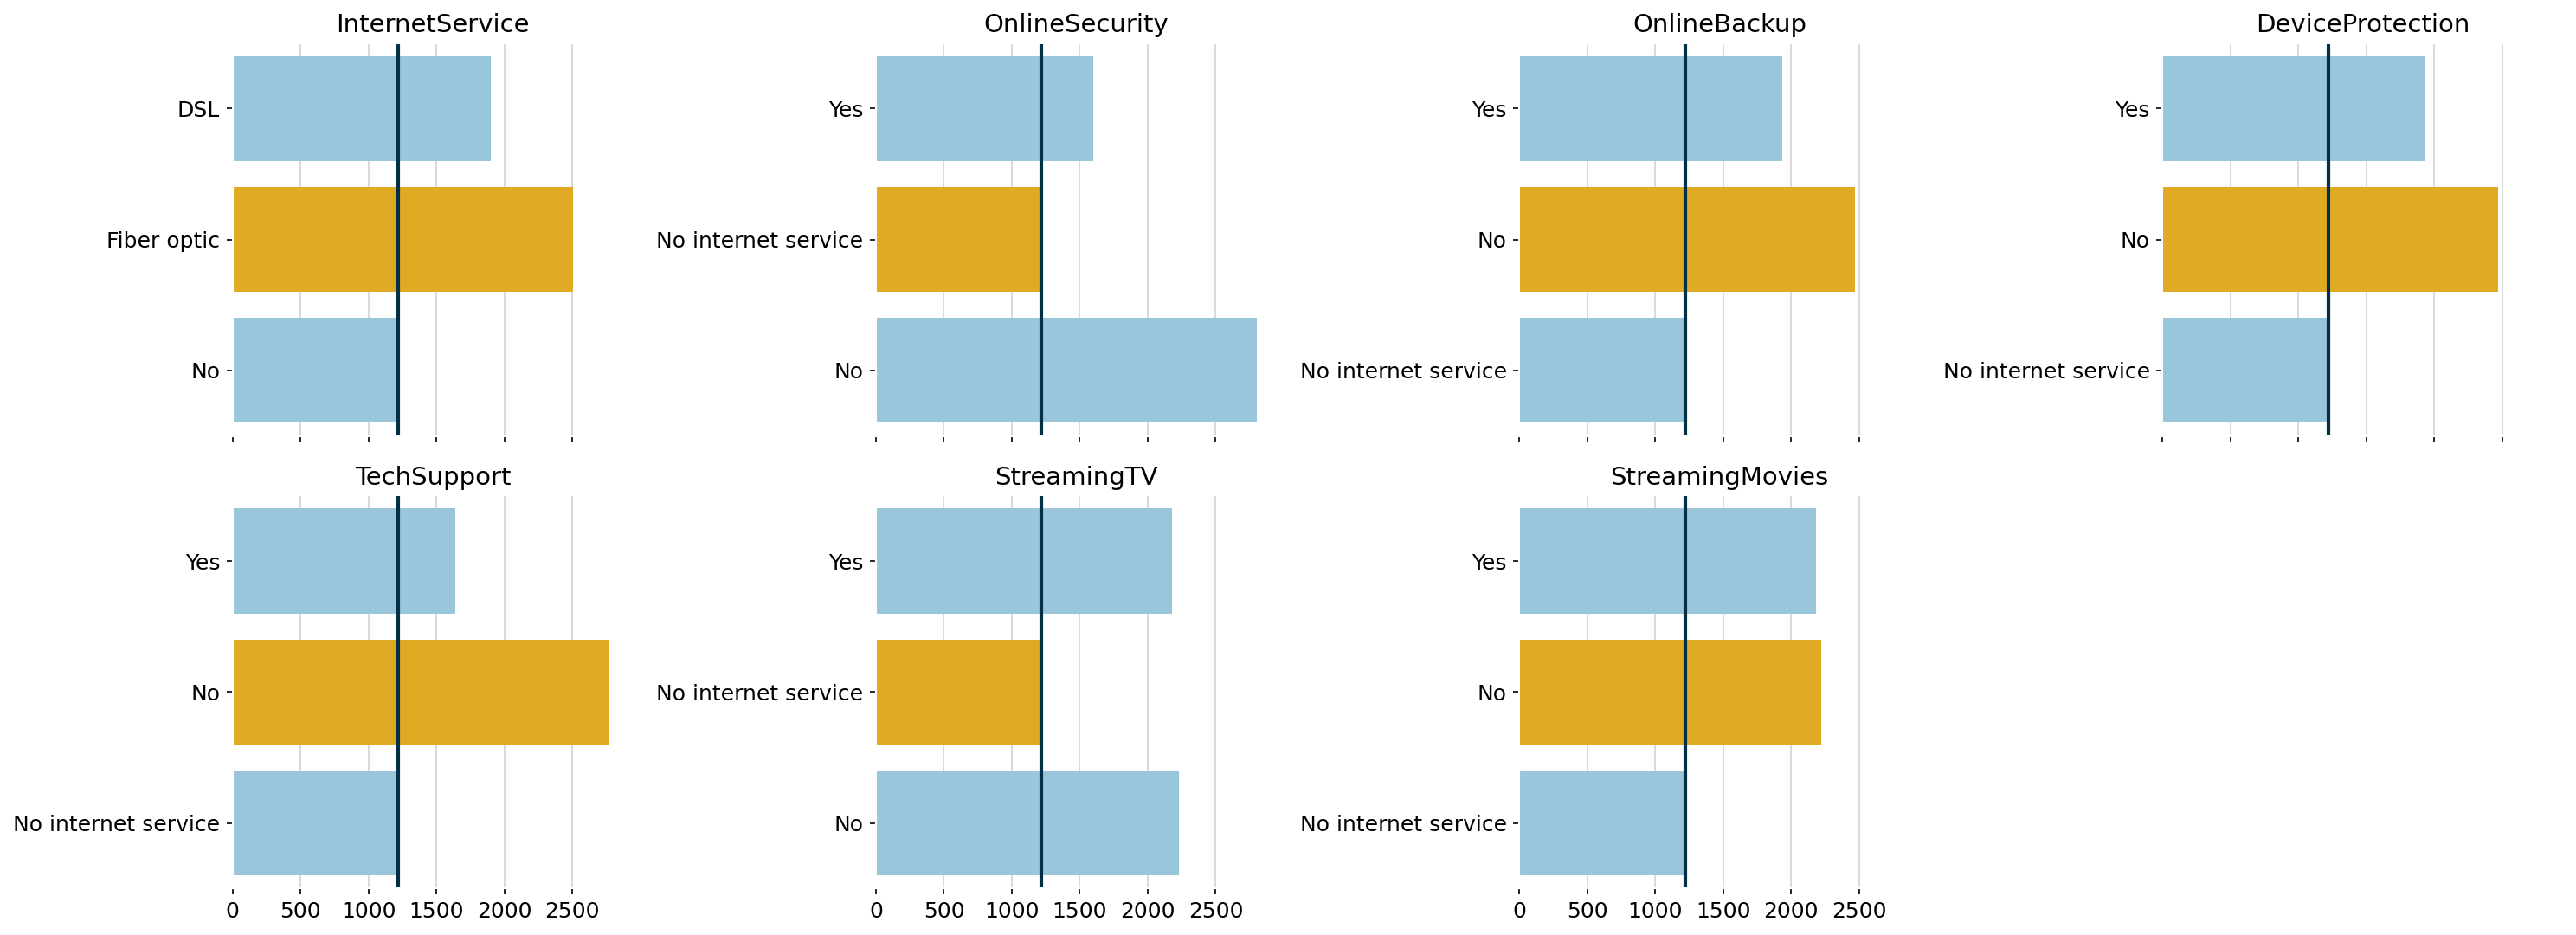

In [35]:
# Eeference lines
No_Int_Serv = df_train['InternetService'].value_counts().loc['No']
group3_vars = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']

fig3, axes3 = plt.subplots(2, 4, figsize=(20, 8), sharex=True)
axes3 = axes3.flatten()

for i, var_name in enumerate(group3_vars):
    sns.countplot(y=var_name, data=df_train, ax=axes3[i], palette=palette_group3)
    axes3[i].axvline(x=No_Int_Serv, linewidth=2, color=color_palette[0])
    axes3[i].set_title(var_name, fontsize=14)
    axes3[i].set_ylabel('')
    axes3[i].set_xlabel('')

fig3.delaxes(axes3[7])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**INSIGHTS:**

* O serviço de internet Fibra Ótica (Fiber optic) é o mais utilizado, superando por uma pequena margem o DSL. Uma parcela relevante de clientes (a barra "No") não possui serviço de internet da empresa

* Para os serviços OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport, a grande maioria dos clientes que possui internet opta por NÃO contratar esses adicionais (a barra "No" é muito maior que a "Yes"). Portanto, existe uma margem significativa de aumento de receita possível com estes produtos.

* Os serviços de Streaming TV e StreamingMovies parecem ter uma boa taxa de adesão, mas conta uma uma taxa quase equivalente de clientes que não optaram por aderir estes serviços.

* Os clientes contratam serviços de streaming mas não veem valor nos serviços de segurança e suporte. A estratégia mais clara seria criar pacotes que atrelem os populares serviços de streaming a um serviço de segurança com desconto, incentivando a contratação e aumentando a proteção da base de clientes.

* Assim como na análise anterior, a consistência é validada. O número de clientes na categoria "No" do gráfico InternetService é exatamente o mesmo que o número de clientes na categoria "No internet service" em todos os outros 7 gráficos de serviços adicionais.

# **Bivariate and multivariate analysis**

 A seguir, farei análises bivariada e multivariada para entender como as features se relacionam entre si, especialmente com a variável alvo (Churn).

### **Avaliando tendências entre variáveis numéricas e Churn**

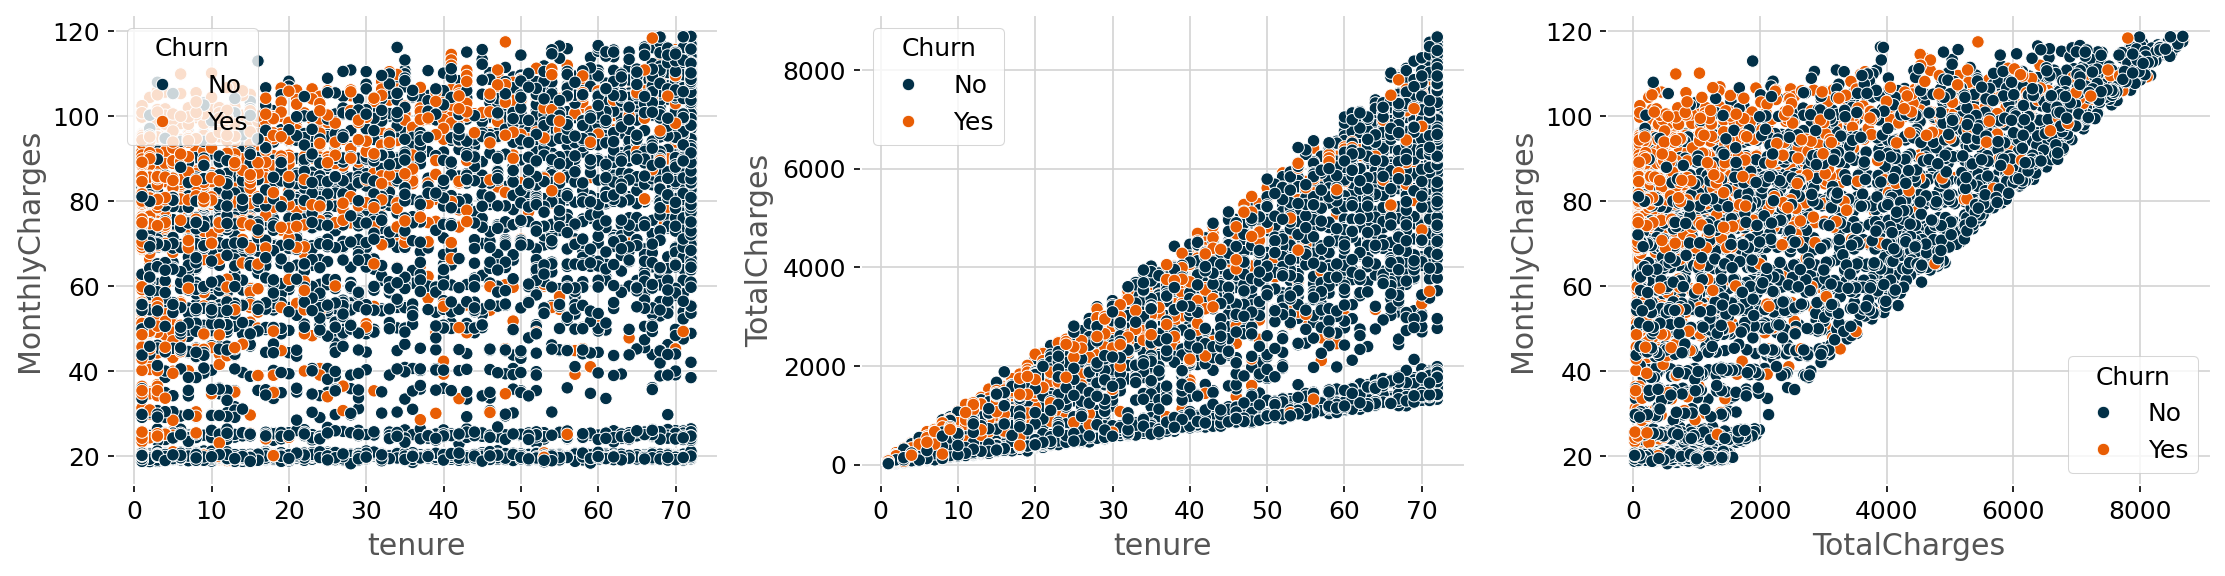

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Use df_train for all scatterplot calls where hue='Churn'
sns.scatterplot(data=df_train, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[0])
sns.scatterplot(data=df_train, x='tenure', y='TotalCharges', hue='Churn', ax=axes[1])
sns.scatterplot(data=df_train, x='TotalCharges', y='MonthlyCharges', hue='Churn', ax=axes[2])


plt.tight_layout()
plt.show()

**INSIGTHS:**

* A relação entre tenure e TotalCharges é fortemente linear e positiva, validando a consistência de que, quanto mais tempo um cliente permanece na empresa, maior o valor total pago por ele.

* A alta dispersão do primeiro gráfico indica que não há correlação entre tenure e MonthlyCharges, o que é consistente com a lógica de negócio: o tempo de um cliente na empresa não determina o valor de sua mensalidade, pois são fatores independentes.

* O formato de "leque" do gráfico MonthlyCharges vs. TotalCharges confirma a interdependência lógica das três variáveis, provando visualmente que o TotalCharges é uma função tanto do valor mensal quanto do tempo de contrato.

* Os gráficos exibem claramente as regiões de risco ao Churn: os cancelamentos se concentram em clientes com baixo tenure (tempo de contrato), especialmente aqueles com MonthlyCharges (cobranças mensais) mais altas.

* Conclusivamente, a análise de correlação visual valida que o dataset é internamente consistente e se comporta de maneira lógica, o que aumenta a confiança na qualidade dos dados para a etapa de modelagem preditiva.


OBS: investigações de correlações entre variáveis numéricas e categóricas são realizadas na etapa de Processamento de Dados, seguindo o o framework **CRISP-DM**.

### **Distribuição de Fetures Numéricas pelo Churn**

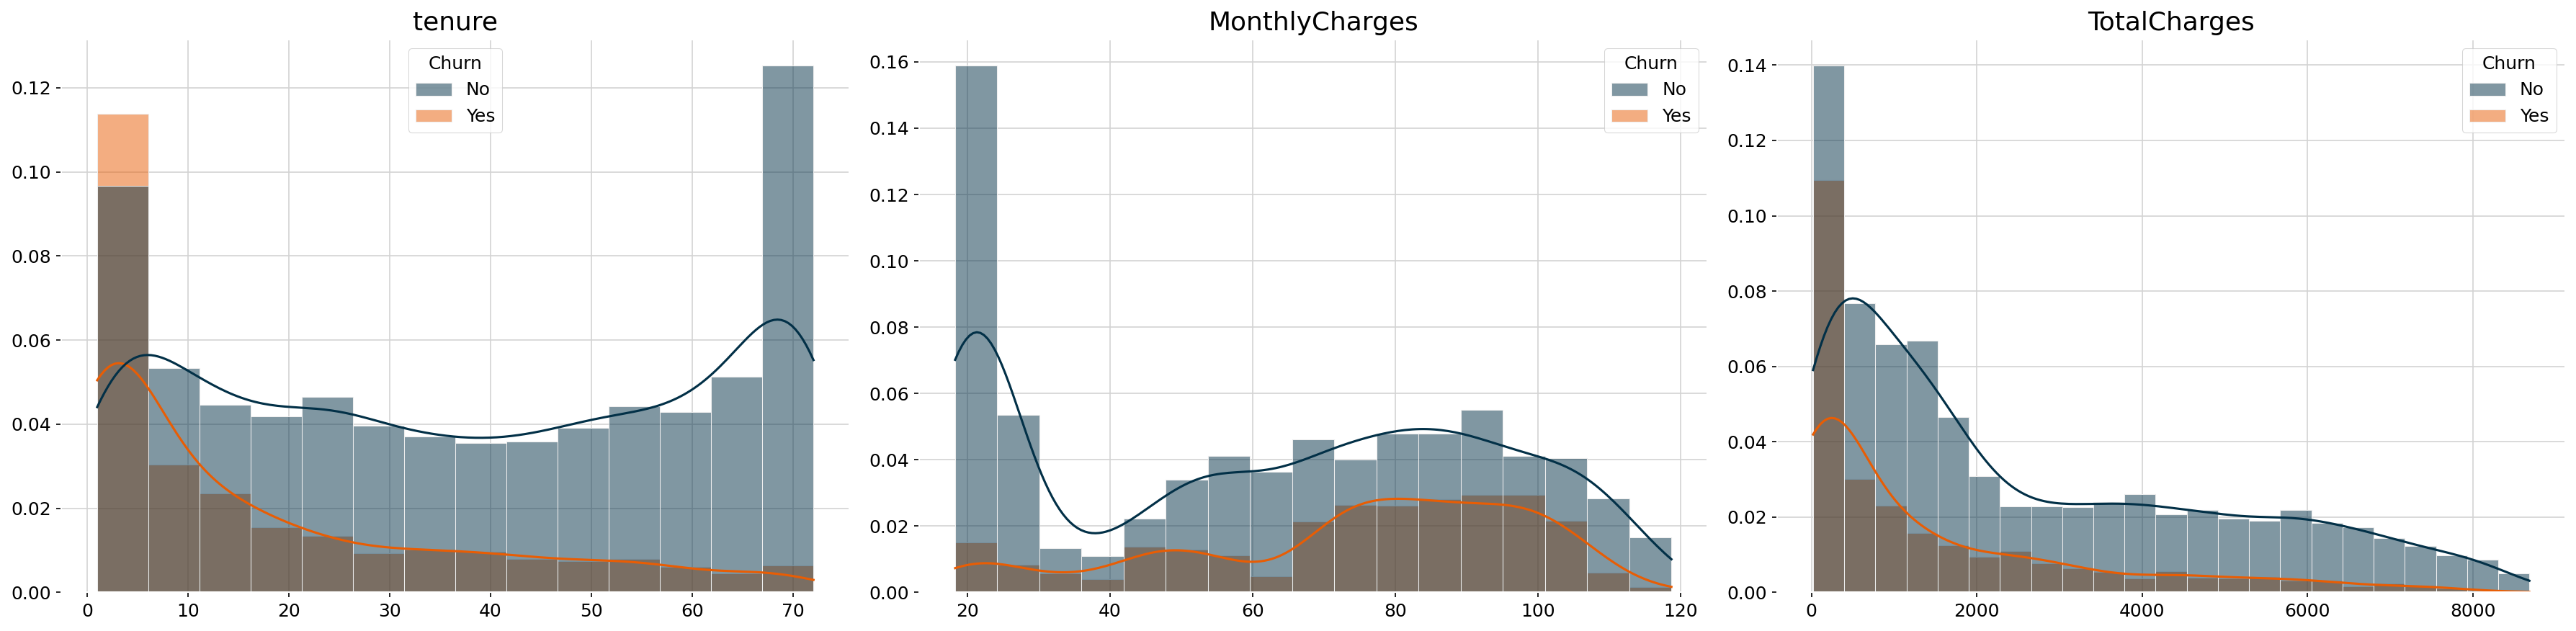

In [37]:
analysis_plots(data=df_train, features=numerical_features, histplot=True, kde=True, hue=target, figsize=(24, 6), palette=palette_Churn)

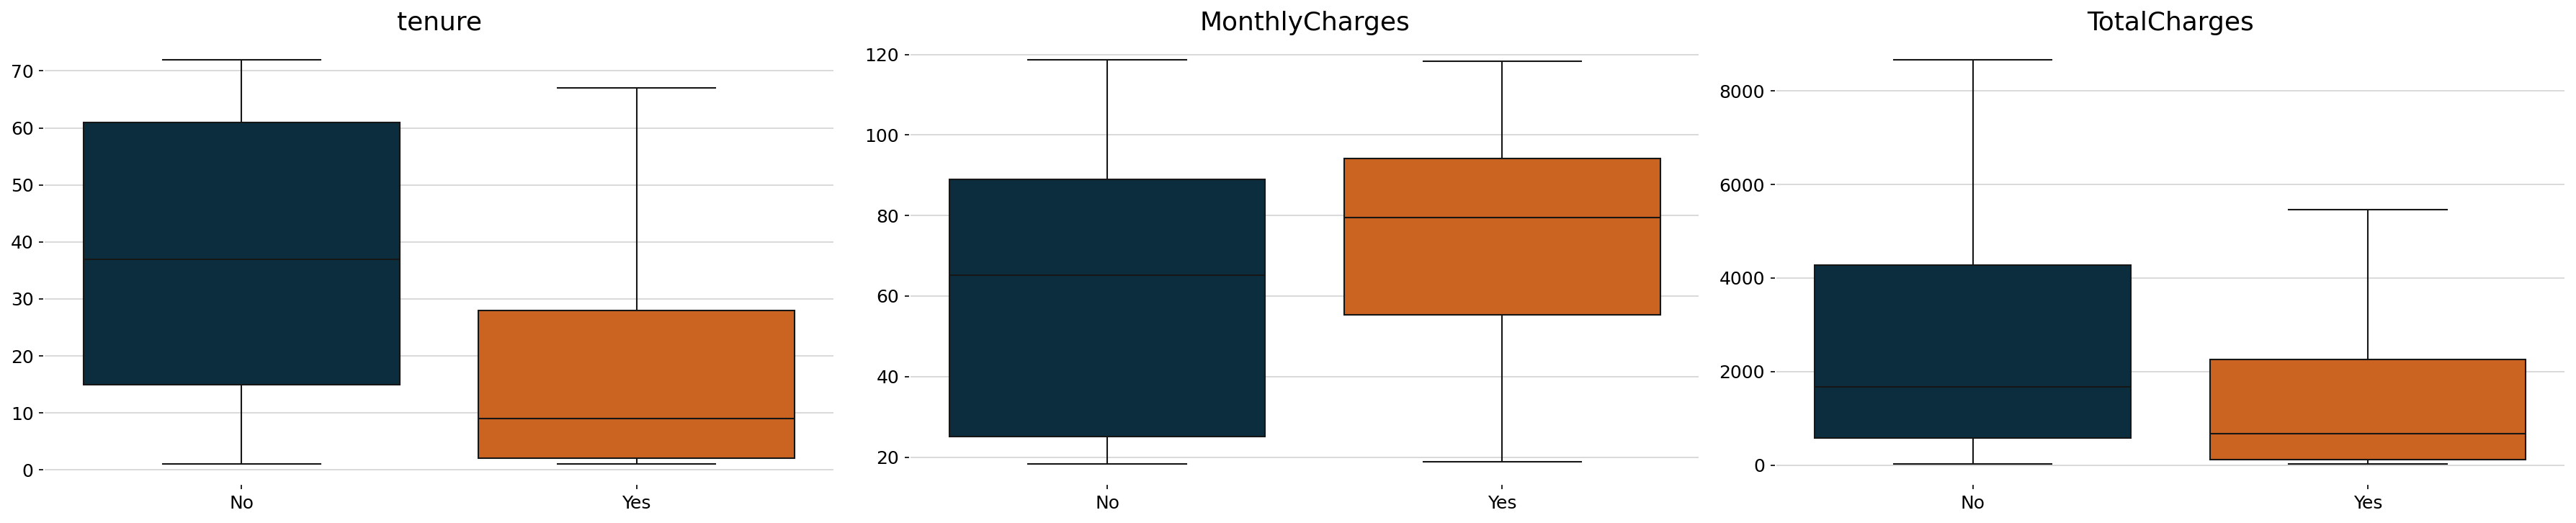

In [38]:
analysis_plots(data=df_train, features=numerical_features, boxplot=True, boxplot_x=target, figsize=(24, 5), palette=palette_Churn)

**INSGIHTS:**

1. Tenure (tempo de permanência do cliente)

Clientes com churn apresentam maior concentração nos primeiros meses de contrato.

Clientes que permanecem mais tempo (próximos ao limite da variável, acima de 60 meses) tendem a não cancelar.

O boxplot mostra que clientes que cancelaram têm, em média, menor tempo de permanência que os clientes que ficaram.

* Insight: o tempo de fidelização é um fator determinante para retenção. Estratégias de engajamento nos primeiros meses podem reduzir churn.

2. MonthlyCharges (valor da fatura mensal)

Clientes que cancelaram possuem uma média mais alta de MonthlyCharges em comparação aos que não cancelaram.

O histograma mostra que há uma concentração de churn em valores médios e altos de cobrança mensal, enquanto valores mais baixos concentram clientes que permanecem.

* Insight: clientes mais sensíveis ao preço estão mais propensos a cancelar. Ofertas personalizadas ou pacotes mais acessíveis podem reduzir a evasão.

3. TotalCharges (total gasto pelo cliente até o momento)

Clientes que não cancelaram têm, em média, TotalCharges maiores, o que reflete maior tempo de permanência e acúmulo de faturas.

Clientes com churn apresentam valores concentrados nas faixas mais baixas de TotalCharges, confirmando o curto ciclo de vida.

* Insight: churn está relacionado ao baixo lifetime value. Monitorar o gasto acumulado pode ajudar a identificar clientes em risco.

4. As variáveis numéricas (tenure, MonthlyCharges, TotalCharges) possuem um alto poder de discriminação, ou seja, são muito eficientes em separar os clientes que cancelam dos que não cancelam. Devido aos gradientes e diferenças de mediana claros nos gráficos, modelos baseados em árvores (como Random Forest ou XGBoost) são ideais para capturar esses padrões de forma eficiente, possivelmente sem a necessidade de pré-processamento complexo como a discretização.

### **Distribuição das Features Categóricas pela taxa de Churn**

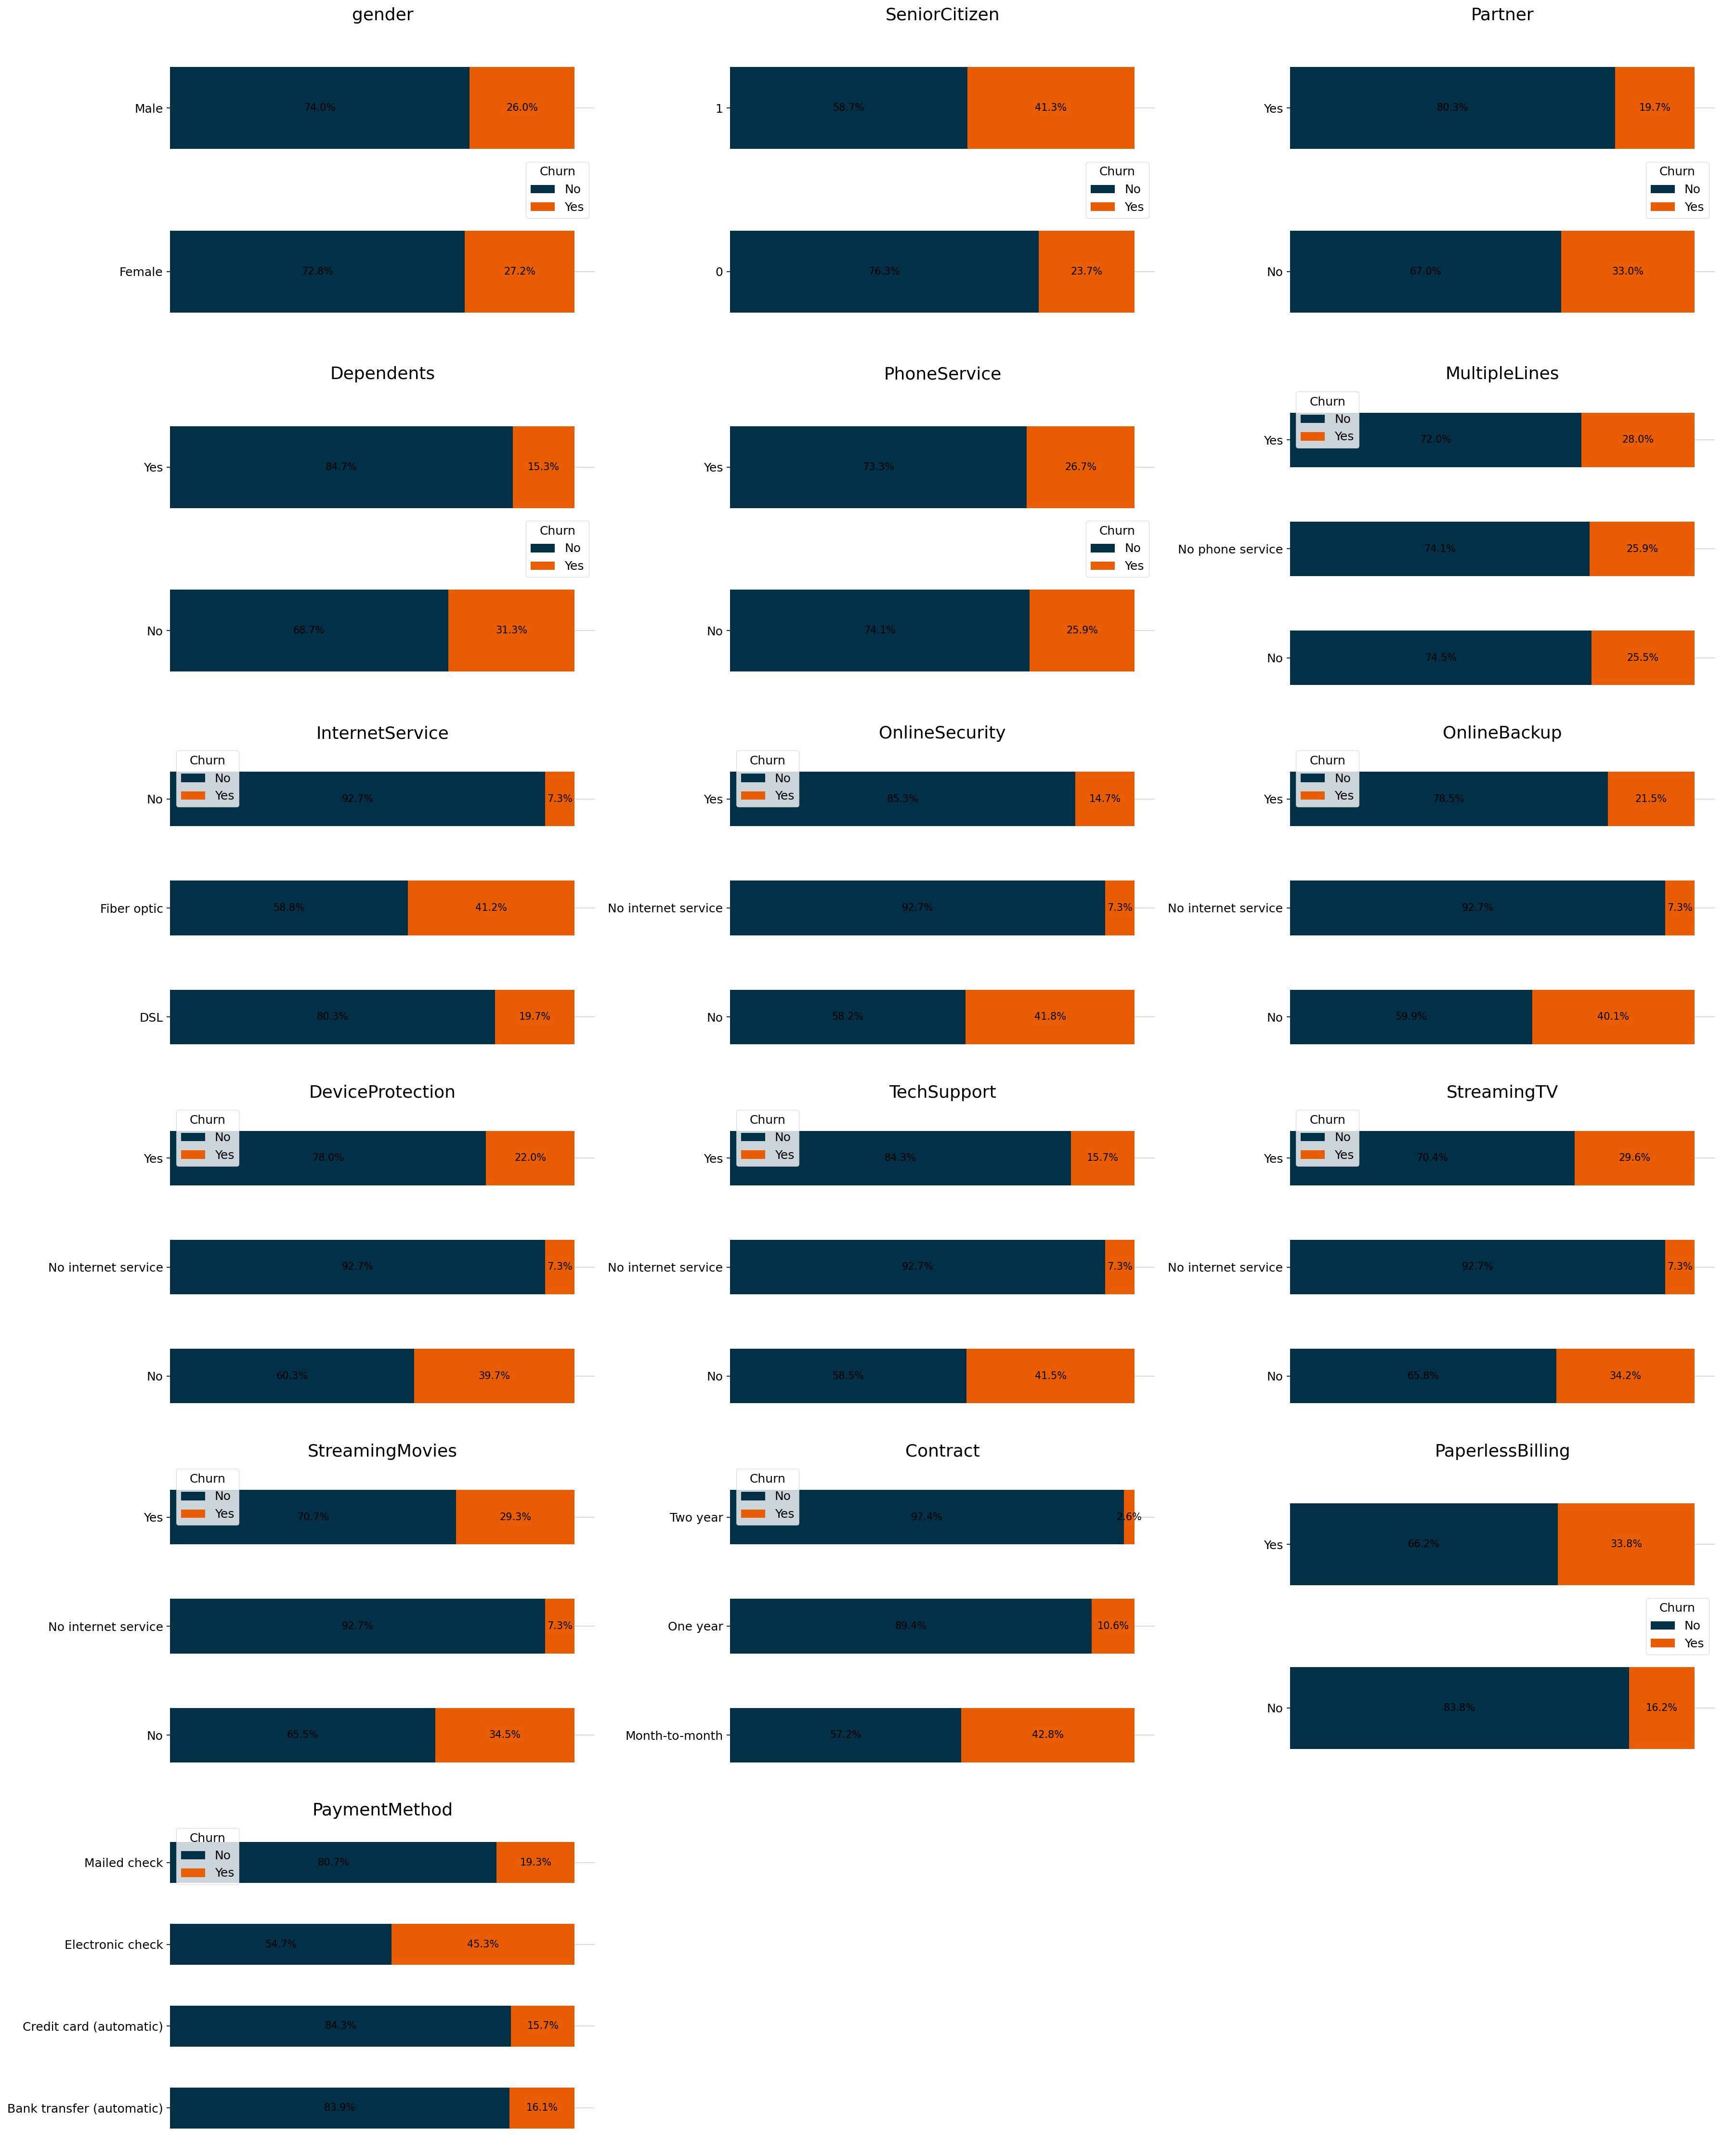

In [39]:
analysis_plots(data=df_train, features=categorical_features, barplot=True, figsize=(24, 30), hue=target, text_y=0.1, save_separate_files=True, save_path='../reports/figures/')

**INSIGHTS:**
1. Perfil Demográfico

Gender: Não há diferença significativa entre homens e mulheres em relação ao churn (≈26% em ambos).

SeniorCitizen: Clientes idosos apresentam maior churn (41%) do que não idosos (23,7%).

Partner e Dependents: Ter parceiro ou dependentes diminuem a taxa de churn.

Insight: clientes com vínculos familiares demonstraram maior fidelidade.

2. Serviços Básicos

PhoneService e MultipleLines: Não apresentam variação expressiva no churn (em torno de 26%).

Insight: esses serviços não são determinantes para retenção ou evasão.

3. Internet e Serviços Adicionais

InternetService:

Clientes de fibra óptica têm churn elevado (41,2%).

DSL apresenta churn menor (19,7%).

Quem não possui internet quase não cancela (7,3%).

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:

Clientes sem esses serviços apresentam churn reduzido.

Clientes que possuem cada um desses serviços apresentam churn próximo de 40%.

StreamingTV e StreamingMovies:

Serviços de streaming não apresentaram diferenças siginifcativas de Churn entre assinantes ou não assinantes.

Insight: serviços de internet e complementares são um fator crítico para evasão, especialmente fibra óptica e pacotes adicionais, que aumentam o custo mensal.

4. Contratos e Pagamentos

Contract:

Month-to-month apresenta a maior taxa de churn (42,8%).

Planos de 1 ano (2,6%) e 2 anos (10,6%) têm churn muito menor.

PaperlessBilling: Clientes que usam cobrança eletrônica têm maior churn (33,8%) em relação aos que não usam (16,2%).

PaymentMethod:

Electronic check tem churn elevado (45,3%).

Métodos automáticos (cartão de crédito ou débito automático) têm churn muito menor (15–16%).

Insight: a forma de contrato e pagamento é um dos fatores mais relevantes. Clientes de contratos longos e com pagamento automático são mais fiéis.

As variáveis NPS (filtrada) e total_services foram analisadas separadamente

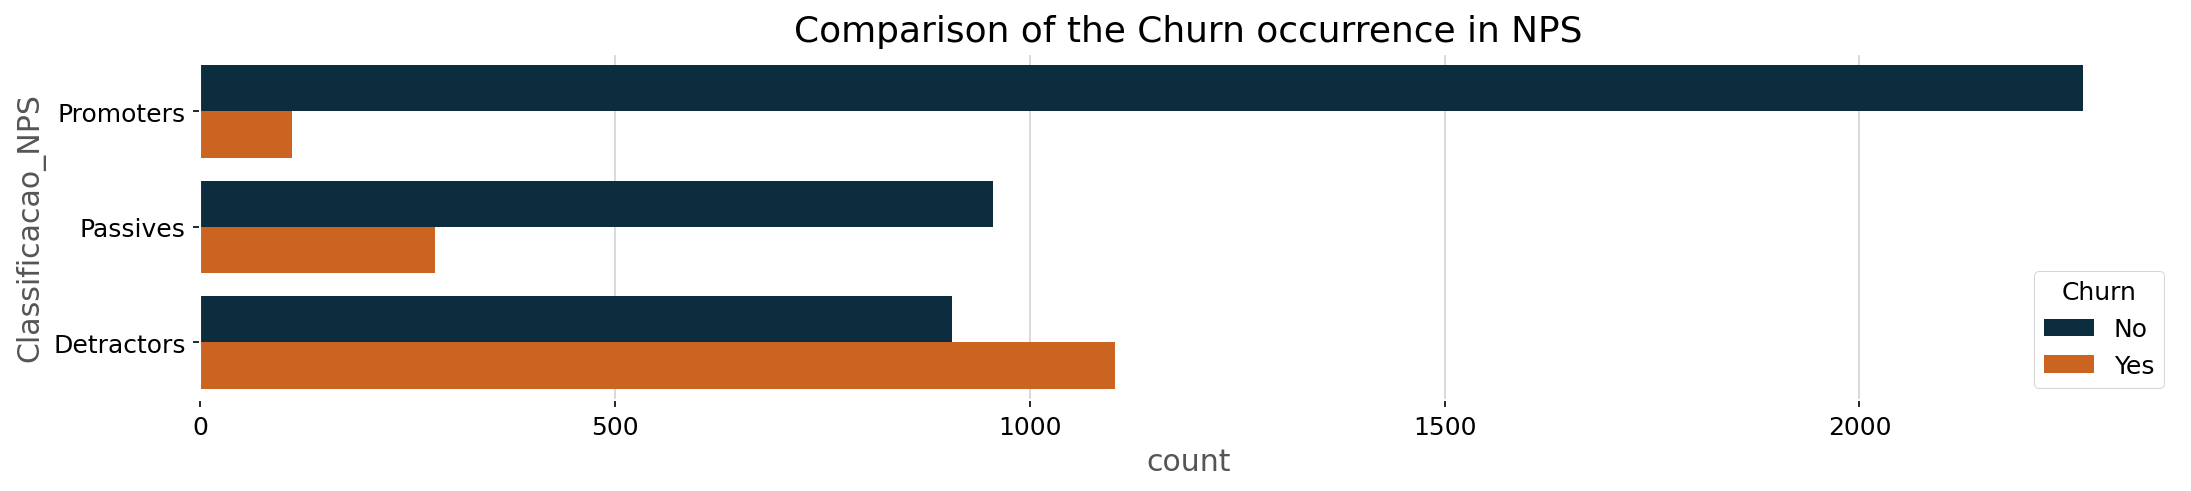

In [40]:
plt.figure(figsize = (17,3))
sns.countplot(data=df_train,y='Classificacao_NPS',hue='Churn').set_title('Comparison of the Churn occurrence in NPS')
plt.show()

INSIGHTS:

* Como era esperado, Promoters tem menos taxa de churn do que Passives e Detractors

* A curto prazo, implementar programa de retenção proativa para Detractors: contato personalizado logo após feedback negativo e analise de reclamações frequentes para corrigir causas estruturais.

* A médio prazo, implementar campanhas de fidelização para Passives (ex.: condições melhores em contratos mais longos).


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


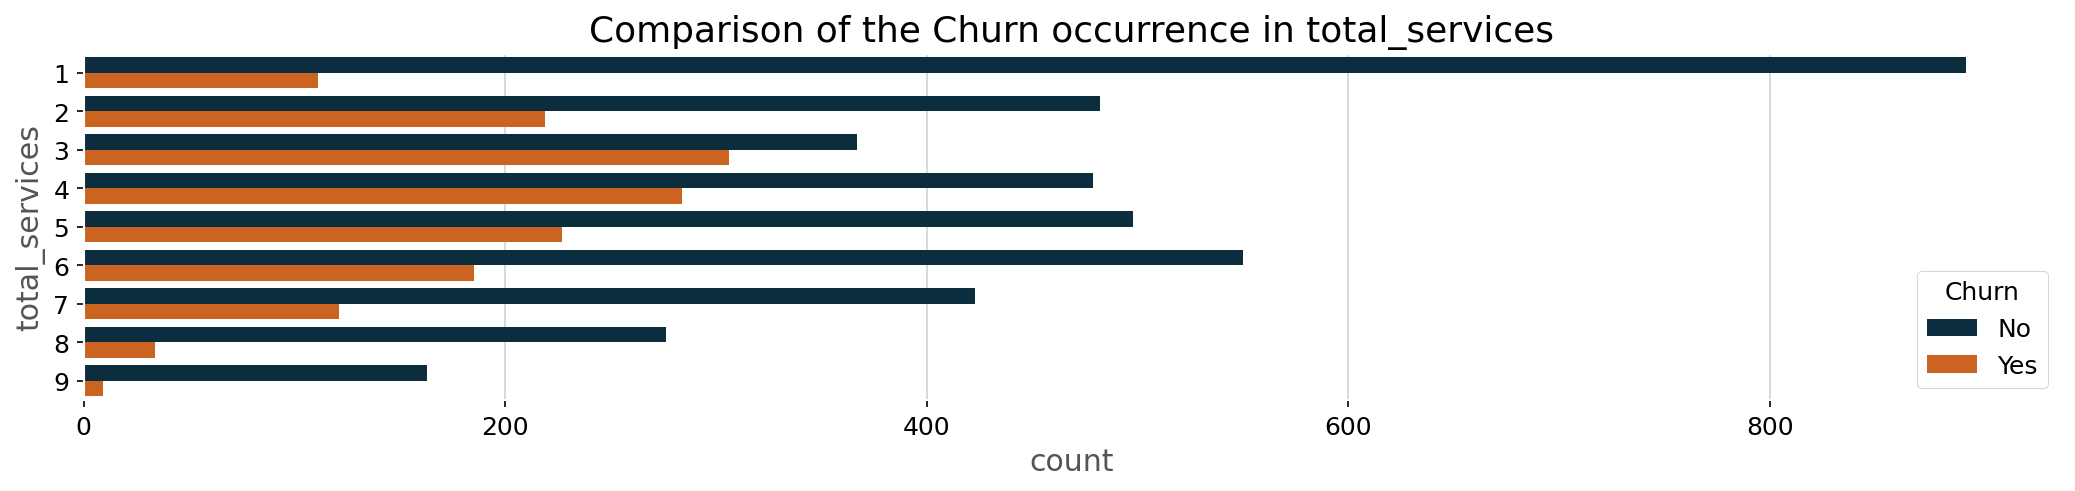

In [41]:
plt.figure(figsize = (17,3))
sns.countplot(data=df_train,y='total_services',hue='Churn').set_title('Comparison of the Churn occurrence in total_services')
plt.show()

In [42]:
df_train.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MonthlyCharges,TotalCharges,NPS,gender,SeniorCitizen,Partner,Dependents,Churn,Classificacao_NPS,total_services
2188,68,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,...,85.00,5607.75,10,Female,0,Yes,Yes,No,Promoters,8
1561,38,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,...,91.70,3479.05,7,Male,0,Yes,No,No,Passives,5
6097,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,...,20.40,42.90,8,Male,0,No,Yes,No,Passives,1
2915,9,Yes,No,Fiber optic,No,No,No,No,Yes,No,...,77.65,714.15,3,Female,0,No,No,Yes,Detractors,3
3386,62,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,...,72.00,4284.20,10,Female,0,Yes,No,No,Promoters,6


### **Conclusões da Análise Exploratória de Dados (EDA)**

Principais insights:

Os clientes que cancelam (churn) estão altamente concentrados nos primeiros meses de contrato (tenure). Particularmente, a maioria dos cancelamentos ocorre antes dos 12 meses, enquanto clientes com mais de 60 meses de contrato quase nunca cancelam. A empresa deve planejar estratégias de onboarding e engajamento no primeiro ano para aumentar a retenção.

Clientes com MonthlyCharges (cobranças mensais) mais altas têm maior probabilidade de cancelar. Isso indica que a sensibilidade ao preço é um forte gatilho para o cancelamento, especialmente para clientes com custos de serviço de médio a alto. A empresa deve revisar os preços dos pacotes e oferecer descontos personalizados para evitar o churn.

Clientes que cancelam tendem a ter TotalCharges (cobranças totais) muito mais baixas, refletindo um curto tempo de vida como cliente. Isso significa que o churn está fortemente ligado a um baixo Valor do Tempo de Vida do Cliente (LTV). Monitorar o LTV pode ajudar a identificar clientes em risco и acionar ações de retenção.

Idosos (Senior citizens) apresentam taxas de churn mais altas em comparação com clientes mais jovens. Em contrapartida, clientes com parceiros e dependentes têm menor probabilidade de cancelar. Isso destaca a importância de considerar o status familiar nas estratégias de segmentação.

Clientes com internet de fibra ótica (fiber optic) têm as maiores taxas de churn, enquanto clientes com DSL cancelam menos. Adicionalmente, clientes com serviços adicionais como OnlineSecurity, Backup, Device Protection, TechSupport e Streaming tendem a cancelar mais, possivelmente devido a custos totais mais elevados. A empresa deve investigar se a percepção de valor corresponde aos custos adicionais.

O tipo de contrato é um fator crítico: contratos mensais (month-to-month) apresentam as maiores taxas de churn, enquanto contratos de 1 e 2 anos reduzem significativamente o cancelamento. Incentivar os clientes a migrarem para contratos de longo prazo pode melhorar fortemente a retenção.

Os métodos de pagamento também importam: clientes que pagam com cheque eletrônico (electronic check) têm as maiores taxas de churn, enquanto métodos automáticos (cartão de crédito ou transferência bancária) estão ligados a um menor cancelamento. Promover a adoção de pagamentos automáticos pode ser uma estratégia eficaz.

Clientes com faturamento digital (paperless billing) cancelam com mais frequência, sugerindo uma possível relação com o perfil do cliente ou sua maturidade digital. Este grupo pode precisar de estratégias direcionadas para reduzir o churn.

No geral, tenure, MonthlyCharges e TotalCharges demonstram um alto poder de discriminação para prever o churn. Modelos baseados em árvores, como Random Forest ou XGBoost, são adequados para capturar esses padrões sem a necessidade de pré-processamento complexo.